<a href="https://colab.research.google.com/github/GildasTaliah/QuantRiskManagement/blob/main/RiskSmartInvest_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RISK SMART INVESTING: Strategic Portfolio Allocation with Quantitative Market Risk Analysis**

# **1. PORTFOLIO ALLOCATION**

# **Intro**

Risk Based portfolios are constructed by using only (or mostly) the information in the covariance matrix, and a major motivation is to avoid the particularly difficult estimation of the expected returns.

The aim of risk based portfolio strategies, which happens to be the objective of this brief project, is to build well-diversified portfolios with low risk out-of-sample.

Examples of Risk based portfolio optimization strategies includes but not limited to: Naive Risk Parity, Risk Parity, Hierarchical Risk Parity, Hierarchical Equal Risk Contribution, Maximum Diversification and Downside Risk Based (VaR and CVaR) portfolios. The well known Markowitz Minimum Variance portfolio is also an example of risk based portfolio strategies.

VaR: Value at Risk. CVaR: Conditional Value at Risk.

For our analysis we consider 6 competing investment strategies namely an **equally weighted** (benchmark), **inverse volatility**, **minimum volatility**,  **risk parity**, **maximum diversification** and the the machine learning-inspired **Hierarchical Risk Parity strategy**.



# **Problem Statement**

In order to compute the optimal weights (except equally weighted) we need information from the covariance matrix. We follow the most straightforward approach to estimating $\mu$ and $\Sigma$ by defining the sample mean vector $\hat{\mu}$  and the sample covariance matrix $\hat{\Sigma}$ as follows:  

\begin{equation}
\hat{\mu}_{i} = \frac{1}{T} \sum_{t=1}^{T} R_{it},  \quad t = 1, 2, \ldots,T \,\, \text{and} \,\, \text{for } i = 1, 2, \ldots, N.  
\end{equation}

\begin{equation}
\hat{\Sigma} = \hat{\sigma}_{ij} = \frac{1}{T-1} \sum_{t=1}^{T} (R_{it} - \hat{\mu}_i)(R_{jt} - \hat{\mu}_j), \quad \text{for } i,j = 1, 2, \ldots, N.  
\end{equation}



where $R_{it}$ represents the return for asset $i$ at time $t$, $\,$ $\mu_{i}$ the expected return of asset $i$, $\,$ $T$ the total number of historical return observations of asset $i$, $\,$ $N$ the total number of assets, $\,$  $\hat{\sigma}_{ij}$ is the covariance between the $i$-th and $j$-th asset returns (in case $i$ = $j$ it becomes the variance of the $i$-th asset returns and written as - $\hat{\sigma}_{i}$).   

We compute annualized portfolio mean $\hat{\mu_{p}}$ and portfolio volatility $\hat{\sigma_{p}}$ as follows:


\begin{equation}
\hat{\mu_{p}} = w_{i} \hat{\mu _{i}}  \quad * \quad  F. \\ \hat{\sigma_{p}} = \text{w}' \hat{\Sigma} \text{w}  \quad * \quad \sqrt{F}.    
\end{equation}

**F** indicates the frequency: days, weeks, months, year; 252, 52, 12, 1.

## **Investment Strategies**

**Equally Weigted:**
An equally weighted strategy allots equal weights to each asset in the portfolio composition and completely disregards the plug-in estimates for the underlying asset moments altogether. It is viewed as an arbitrarily manner of de-concentration of portfolio weights which is quite good. However, avoiding the correlation structure between assets makes it vulnerable to systematic shocks. We compute the portfolio weights as follows:

\begin{equation}
w_{i} =  \frac{1}{N}, \quad \text{for } i = 1, 2, \ldots, N.
\end{equation}


### **Inverse Volatility:**

The inverse volatility portfolio (or naive risk parity)  obtains portfolio weight proportional to the inverse of each assets volatility. Like the equally weighted it also ignores the correlation between assets and makes it vulnerable to systematic shocks. On the upside, it accounts for variances, thereby reducing the impact of systematic shocks compared to equally weighted. Portfolio weights are computed as as follows:

\begin{equation} {w_{i}}  = \frac{\frac{1}{\hat{\sigma}_{i}}}{\frac{1}{\hat{\sigma}_{1}} + \frac{1}{\hat{\sigma}_{2}} + \cdots + \frac{1}{\hat{\sigma}_{N}}}, \quad \text{for } i = 1, 2, \ldots, N. \end{equation}

### **Minimum Volatility:**

**Modern portfolio theory** solves for the optimal weights to minimize the portfolio volatility for a certain level of returns or maximizes returns for a certain level of portfolio volatility. The key inputs are the expected returns and the covariance matrix. The minimum volatility is the portfolio with the lowest risk on the **efficient frontier**. Portfolio weights are computed as follows:




\begin{equation}
\underset{\text{w}}{\text{Min : }}
\sigma_{p} =  \text{w}^{'} \Sigma \text{w}  * \sqrt{F},  \\
\text{s.t:} \quad \sum_{i=1}^{N} w_i = 1 \quad \text{and} \quad lb \leq w_i \leq ub  \quad \text{for } i = 1, 2, \ldots, N. \end{equation}

- The **summation** constraint implies we want the portfolio fully invested;
- $\textit{lb}$ and $\textit{ub}$  $\,$ represent the lower and upper bound constraints on each assets weight. For instance an $\,$ $lb=0$, and
- $ub=1$  $\,$ is a constraint portfolio where we do not allow for **shortselling**.


### **Risk Parity:**

Risk Parity investment strategy obtains portfolio weights such that the risk contribution **(RC)** of each asset in the portfolio are equal. Risk contribution of an asset is the amount of total portfolio risk/volatility that is attributable to a particular asset. The Risk Contribution of asset $i$ is the partial derivative of the portfolio volatility with respect to asset's $i$ weight, it is given as:

\begin{equation} RC_{i} = w_{i} \cdot \frac{\partial \hat{\sigma_{p} }}{\partial  w_{i}} = \frac{ w_{i}(\hat{\Sigma} w)_{i}}{\sqrt{\text{w} \hat{\Sigma}\text{w} }}, \quad \text{for } i = 1, 2, \ldots, N. \end{equation}



If we sum the risk contribution of the underlying asset we obtain the portfolio volatility $\hat{\sigma}_{p}$. There exist multiple approaches to arrive at equal risk contribution. In this analysis our approach aims to minimize the squared distance between the equal risk contribution as shown below:

\begin{equation} \underset{ \text{w} }{\text{Min :  }} \sum_{1=i}^N \quad  \left(\frac{ w_{i}(\hat{\Sigma} w)_{i}}{\sqrt{ \text{w}^{'} \hat{\Sigma} \text{w} }} -  \frac{\hat{\sigma_{p}}}{N}\right) ^2  , \\
\text{s.t:} \quad \sum_{i=1}^{N} w_i = 1   
\quad \quad \text{and} \quad lb \leq w_i \leq ub  \quad \text{for } i = 1, 2, \ldots, N. \end{equation}



### **Maximum diversification:**

Maximum diversification is an investment strategy that aims at maximizing the diversification benefit by optimizing the diversification ratio. The diversification ratio is defined as the ratio of the weighted sum of individual assets volatilities to the portfolio volatility. The diversification ratio is given as:

\begin{equation} D(w) = \frac{\sum_{i =1}^N w_{i} \hat{\sigma}_{i}}{\sqrt{ \text{w}^{'} \hat{\Sigma} \text{w}}}, \quad \text{for } i = 1,2,...,N. \end{equation}


$\hat{\sigma}_{i}$ is the volatility of asset $i$. Due to diversification the portfolio volatitility is less than the weighted sum of individual volatlity. If the portfolio volatility becomes more and more smaller compared to the weighted volatility: the diversification ratio increases.

Thus maximizing the diversification ratio leads to optimal portfolio (with highest ratio). The optimization procedure is presented as follows:

\begin{equation} \underset{ \text{w} }{\text{Max}:}  \frac{\sum_{i =1}^N w_{i} \hat{\sigma}_{i}}{\sqrt{ \text{w} \hat{\Sigma} \text{w}}}, \\ \text{s.t:} \quad \sum_{i=1}^{N} w_i = 1   
\quad \quad \text{and} \quad lb \leq w_i \leq ub \quad \text{for } i = 1,2,...,N.
\end{equation}




### **Hierarchical Risk Parity Portfolio**

The Hierarchical Risk Parity portfolio is a novel risk-based investment strategy developed by Marcos Lopez de Prado. It is said to be an unsupervised Machine Learning (ML) inspired portfolio optimization strategy that combines naive risk parity with an unsupervised ML technique - hierarchical clustering. Following a *top-down* approach to attribute weights to assets.

The approach works as follows:
- **Correlation Matrix**: First we start by creating a correlation matrix for all asset in our portfolio. This matrix shows how each asset's return move in relation to others.
- **Distance Matrix**: We convert the correlation matrix into a distnace matrix. An example distance matrix is computed as: $\mathbf{\sqrt{2\, *(1-correlation)}}$ . This implies highly correlated asset would have a small distance, while uncorrelated asset would have large distance.  
-  **Clustering**: Using the obtained distance matrix, we perform hierarchical clustering utilizing a **linkage method**. This groups similar assets together creating a tree like structure called **dendogram**. The clustering starts with individual assets and progressively groups them based on their similarities. Additionally we don't have to gues in advanve, how many clusters potentially exist.
- **Quasi-Diagonalization**: We rearrange the correlation matrix based on the clustering. This creates a quasi-diagonal matrix, where similar assets are grouped together along the diagonal.
- **Recursive Bisection** :  This is where the **top-down** part comes in:
-- **A**. Now the clusters have been obtained, for each sub-clusters we calculate its **variance** using the quasi digonalized matrix.
-- **B**. Allocate portfolio weights to each (parent) cluster inversely proportional to their variances. Proceed to allocate parent clusters weight to each sub-clusters inversely proportional to their variances, repeat this process for each sub-clusters until the individual assets.
- **Final Weights**: The weights of the individual assets are determined by the recursive bisection process. Assets in **lower - variance (risk) clusters** will generally receive **higher weights**.



This approach which combines naive risk parity with an unsupervised learning technique (hierarchical clustering), has the advantage in that it allocates risk in a manner that avoids the pitfalls associated with traditional optimization techniques, such as sensitivity to estimation errors, ill conditioned covariance matrix or difficulty with inverting the covarinace matrix, and the portfolio strategy seems to perform well out-of-sample.






## **Shrinkage Estimation**

The in-sample (ex-ante) optimum weight for the investment strategies (except equally weighted) is a function of the sample covariance matrix $\hat{\Sigma}$, which is usually subject to estimation errors. Thus computed optimum weights are almost certainly different from true optimum weights.

The presence of these errors in the optimization procedss will lead to error maximization, whereby large positive weights are allocated to assets with large positive errors in the expected means and/or large negative errors in the variances and correlations, and vice versa.

In this regard, an investor is not only faced with market risk (randomness of future returns) but also with estimation risk. To curb this, a shrinkage technique such the Ledoit and Wolf single factor shrinkage technique can be de employed to mitigate the estimation errors. This technique involves combining the sample covariance and a target matrix.

The sample covariance matrix an unbiased estimator of the true covariance matrix, as previously mentioned is full of **estimation errors** while the target matrix is usually error-free but **biased**. The shrinkage intensity $\hat{\alpha}$ is obtained such that the conglomerate matrix $\Sigma^s$ has less estimation errors compared to the sample covariance $\hat{\Sigma}$ and is less biased than the target matrix $\hat{F}$. Shrinkage covariance is computed as:

\begin{equation} \hat{\Sigma^s} = \hat{\alpha} * \hat{F} +  (1 - \hat{\alpha}) * \hat{\Sigma}
\end{equation}



# **Model Implementation**

In this section we implement the models that were defined under **Investment Strategies**. First we start off by importing the necessary packages, then proceed to define the necessary functions.

In [110]:
# Import global packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

%matplotlib inline

In [111]:
 # Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [112]:
# Function to read data from yahoo
# Auto_adjust implies: Adjust for dividends, splits etc

def read_data(tickers: list, start: str, end: str, freq: str) -> pd.DataFrame:
   """
   Read data from yahoo finance, takes in list of tickers and returns df with Adj Close prices
   """
   return (yf.download(tickers, auto_adjust= True, start=start, end=end, interval=freq)['Close'])

In [113]:
# Create ticker lists

# 15 Randomly selected stocks from DAX Plus Export Strategy index composition
ExpTick = (["WAF.DE", "HEI.DE", "PUM.DE", "SY1.DE", "MRK.DE", "SHL.DE", "BMW.DE",
"KRN.DE", "G1A.DE", "MTX.DE", "HEN3.DE", "ADS.DE", "FRE.DE", "BAYN.DE","BOSS.DE"])

# 20 Randomly selected from DAX Plus Maximum Dividend index composition
DivTick = (["AIXA.DE", "ALV.DE", "BAS.DE", "BMW.DE", "BC8.DE", "BNR.DE", "CBK.DE",
"EVD.DE", "DBK.DE", "DB1.DE", "DHL.DE",  "EOAN.DE", "FNTN.DE", "GXI.DE", "HEN3.DE", "NEM.DE",
"PUM.DE", "G24.DE", "VOW3.DE", "WCH.DE" ])

# 30 Randomly selected stocks from DAX 50 ESG index composition
EsgTick = ([ "FRA.DE", "DBK.DE",  "ADS.DE", "ALV.DE", "NDA.DE", "BAS.DE", "BMW.DE",
"BEI.DE", "CBK.DE",  "1COV.DE", "DB1.DE", "DBK.DE" ,"DTE.DE", "FNTN.DE",  "FRE.DE", "G1A.DE",
"HNR1.DE", "HEN3.DE", "BOSS.DE", "IFX.DE",  "LIN.DE", "LHA.DE", "MRK.DE", "MUV2.DE",
"SAP.DE", "G24.DE", "SIE.DE", "TLX.DE", "DHL.DE" ,"VNA.DE", "WCH.DE"])

Tickers = {'DaxExpTick': ExpTick, 'DaxDivTick': DivTick, 'DaxEsgTick': EsgTick}

In [114]:
# Download data
# We use five years of data until Dec 2023 for in-sample data
start = '2019-06-01'   # July 2019
end = '2023-12-30'     # Dec 2023
freq = '1d'            # Daily data
Data = ({ key: read_data(ticker, start, end, freq) for key, ticker in
           Tickers.items()})

[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  30 of 30 completed


## **Handling Missing Data**


In [115]:
# Check missing values
{key: df.isnull().values.any() for key, df in Data.items()}

{'DaxExpTick': False, 'DaxDivTick': True, 'DaxEsgTick': True}

In [116]:
Data['DaxExpTick'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1167 entries, 2019-06-03 to 2023-12-29
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ADS.DE   1167 non-null   float64
 1   BAYN.DE  1167 non-null   float64
 2   BMW.DE   1167 non-null   float64
 3   BOSS.DE  1167 non-null   float64
 4   FRE.DE   1167 non-null   float64
 5   G1A.DE   1167 non-null   float64
 6   HEI.DE   1167 non-null   float64
 7   HEN3.DE  1167 non-null   float64
 8   KRN.DE   1167 non-null   float64
 9   MRK.DE   1167 non-null   float64
 10  MTX.DE   1167 non-null   float64
 11  PUM.DE   1167 non-null   float64
 12  SHL.DE   1167 non-null   float64
 13  SY1.DE   1167 non-null   float64
 14  WAF.DE   1167 non-null   float64
dtypes: float64(15)
memory usage: 145.9 KB


In [117]:
## Print missing values
miss_data = [Data['DaxExpTick'][col].isna().sum() for col in Data['DaxExpTick'].columns]
np.array(miss_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [118]:
miss_data = [Data['DaxDivTick'][col].isna().sum() for col in Data['DaxDivTick'].columns]
np.array(miss_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [119]:
miss_data = [Data['DaxEsgTick'][col].isna().sum() for col in Data['DaxEsgTick'].columns]
np.array(miss_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [120]:
# Forwad fill missing values
Data = ({key: df.fillna(method='ffill') for key, df in Data.items()})

In [121]:
## Re-check missing values
miss_data = [Data['DaxDivTick'][col].isna().sum() for col in Data['DaxDivTick'].columns]
np.array(miss_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [122]:
miss_data = [Data['DaxEsgTick'][col].isna().sum() for col in Data['DaxEsgTick'].columns]
np.array(miss_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [123]:
# @title Compute simple returns.
Returns = {key: df.pct_change().dropna() for key, df in Data.items()}

# compute log returns
Returns = {key: np.log(df).diff().dropna() for key, df in Data.items()}

In [124]:
Returns['DaxExpTick'].head()

Ticker        ADS.DE   BAYN.DE    BMW.DE   BOSS.DE    FRE.DE    G1A.DE  \
Date                                                                     
2019-06-04 -0.004640  0.011441  0.028626  0.026113  0.019948  0.041413   
2019-06-05 -0.002328 -0.009587 -0.006485 -0.004493 -0.003101 -0.000394   
2019-06-06  0.011972 -0.012865 -0.010849 -0.006777 -0.015867 -0.022715   
2019-06-07  0.018070 -0.007913 -0.000321  0.012763 -0.001198  0.013611   
2019-06-11 -0.011947  0.018366  0.010535  0.041642  0.018884  0.034776   

Ticker        HEI.DE   HEN3.DE    KRN.DE    MRK.DE    MTX.DE    PUM.DE  \
Date                                                                     
2019-06-04  0.023398  0.006574  0.026876  0.003167 -0.002307  0.006689   
2019-06-05 -0.008230 -0.001214 -0.006301  0.001129  0.016041  0.022600   
2019-06-06 -0.008597  0.006056 -0.000720  0.004501 -0.000253  0.007421   
2019-06-07  0.009187  0.008416  0.002158  0.004481  0.017034  0.029146   
2019-06-11  0.025052  0.012139  0.029726  0.017068  0.003966 -0.014467   

Ticker        SHL.DE    SY1.DE    WAF.DE  
Date                                      
2019-06-04 -0.016585 -0.011627  0.031687  
2019-06-05  0.003396  0.018445 -0.009044  
2019-06-06  0.011794  0.010952 -0.023306  
2019-06-07  0.010000  0.018370  0.013525  
2019-06-11  0.010175  0.012437  0.044224

Next, we define code necessary to compute the covariance matrix. Our function also incorporates the option to shrink the covariance matrix when requested.

In [125]:
#pip install PyPortfolioOpt

In [169]:
from pypfopt.risk_models import risk_matrix as rm

# Define annualized covariance function
def covM(rets_df: pd.DataFrame, shrink: bool = False, freq: int = 252) -> pd.DataFrame:
  # Takes in return df, and returns desired covariance matrix
    covM = rets_df.cov()
    if not shrink:
        return covM * freq  # Assuming daily data
    else:
        mtd = 'ledoit_wolf_single_factor'  # Shrinkage Method!
        #print(f'Shrunk the Covariance Matrix. Method: {mtd}')
        return rm(rets_df, returns_data=True, frequency=freq, method=mtd)


The **scipy.minimize** package provides algorithms for constrained minimization namely 'trust-constr' , 'SLSQP' and 'COBYLA'. Each requires the constraints to be defined using slightly different structures.

The method 'trust-constr' requires the constraints to be defined as a sequence of objects LinearConstraint and NonlinearConstraint. Methods 'SLSQP' and 'COBYLA', on the other hand, require constraints to be defined as a sequence of dictionaries, with keys type, fun etc. [see more here!](https://docs.scipy.org/doc/scipy/tutorial/optimize.html#defining-bounds-constraints)

'trust-constr' and 'SLSQP' are suited for our optimization problem. Whilst the **trust-constr** algorithm maybe computationally expensive than **SLSQP**
,  robustness and convergence is almost guaranteed with **trust-constr**. In this analysis we resort to the former.

The following code block contains the necessary code to compute the **Equally Weighted**, **Inverse Volatility**, and **Minimum Volatility** portfolios. For the Minimum Volatility portfolio, the weight constraint is set to be between 0.0001 and 1.  The lower bound of 0.0001 is to ensure that the optimizer does not allocate a 0.0 weight to any asset.

In [170]:
# Import minimize function, together with LinearConstraint and Bounds object
from scipy.optimize import minimize as min, LinearConstraint, Bounds

def minvol(rets_df: pd.DataFrame, shrink: bool = False) -> pd.DataFrame:

  '''
  Input: stock returns data frame. Default to not shrink the the sample covariance.

  Output: equally weighted, inverse volatility, eigen portfolio_1 and  min volatility
  optimum weight data frame.
  '''

  # Number of assets
  noa = len(rets_df.columns)

  ## 1 -- >  Compute Equal weight
  w = np.repeat(1/noa, noa)

  # Call annualized covariance function
  # Compute covariance matrix
  covm = covM(rets_df, shrink=shrink)

  ## 2 -- > Compute inverse volatility weight
  InVol = 1.0 / covm.values.diagonal()
  w_invol = InVol / sum(InVol)

  ## Portfolio annualized return
  def port_ret(w):
    return np.sum(rets_df.mean() * w) * 252
  ## Portfolio annualized volatility
  def port_vol(w):
    return np.sqrt(np.dot(w.T,  np.dot(covm, w)))

  ## Ex-ante/In-sample Results
  # Equally weighted: ex-ante results
  eq_ret = port_ret(w) * 100
  eq_vol = port_vol(w) * 100

  # Inverse volatility: ex-ante results
  invl_rt = port_ret(w_invol) * 100
  invol_vol = port_vol(w_invol) * 100


  ''' We define the Budget (or Sum) and non-negativity constraint to be used inside the
  min vol optimization process.
  '''
  ## Budget and non-negativity constraints
  # Equality constraint: Budget/sum constraint
  sum_cons = LinearConstraint( [1.0] * noa, [1.0], [1.0])

  # Inequality constraint: Lower and upper bounds
  lb, ub =  0.0001, 1.0
  bnds =  Bounds(lb * noa, ub * noa)


  ''' Now we obtain the optimum portfolio weight for minimum variance portfolio
  '''
  ## minimizing the portfolio volatility
  optMV = min(port_vol, # Objective function
              w,  # Initial (weight) guess
              method = 'trust-constr', # Optimization algorithm
              constraints = sum_cons,
              bounds = bnds )

  ## 3 -- > Minimum Volatility weights
  mv_w = optMV.x
  mv_ret = port_ret(mv_w) * 100
  mv_vol = port_vol(mv_w) * 100


  ## Print all ex-ante/In-sample results.
  print('**' * 6, 'In-Sample results', '***' * 4)
  if shrink:
    print('Shrunk the Covariance Matrix. Method: ledoit_wolf_single_factor')
  print(f'EqWeit. Annz Rets: {eq_ret:.4f}   Vol: {eq_vol:.4f}')
  print(f'InvVol. Annz Rets: {invl_rt:.4f}   Vol: {invol_vol:.4f}')
  print(f'MinVol. Annz Rets: {mv_ret:.4f}   Vol: {mv_vol:.4f}')

  ## Store weights in df and return df
  weight_df = pd.DataFrame({'Equal_W': w, 'InvVol_W': w_invol, 'MinVol_W': mv_w}, index = rets_df.columns)

  return weight_df

The next defined function contains the code necessary to compute the **Risk Parity** and **Maximum Diversification** portfolio with weight constraint to be between **0.0001** and **1**.




In [171]:
def rp_maxdv(rets_df: pd.DataFrame, shrink: bool = False) -> pd.DataFrame:

  '''
  Input: stock returns data frame. Default, to not shrink the the sample covariance.

  Output: risk parity and maximum diversification optimum weight data frame.

  '''

  # Number of assets
  noa = len(rets_df.columns)

  # Obtain Equal weight
  w = np.repeat(1/noa, noa)

  # Call annualized covariance function
  # Compute covariance matrix
  covm = covM(rets_df, shrink=shrink)

  # Portfolio annualized return
  def port_ret(w):
    return np.sum(rets_df.mean() * w) * 252
  # Portfolio (annualized covariance) volatility
  def port_vol(w):
    return np.sqrt(np.dot(w.T,  np.dot(covm, w)))

  ''' We impose the Budget and non-negativity constraint to be implemented inside
   the opmization process of the competing quantitative investment strategies.
  '''
  ## Budget and non-negativity constraints
  # Equality constraint: Budget/sum constraint
  sum_cons = LinearConstraint([1.0] * noa, [1.0], [1.0])

  # Inequality constraint: Lower and upper bounds
  lb, ub =  0.0001,  1.0
  bnds =  Bounds(lb * noa, ub * noa  )

  ''' Now we obtain the optimum portfolio weight for risk parity portfolio
  '''
  # Define risk contibution function
  def rc_err(w):

    #covm = covM()
    # Denominator of Risk contribution function
    denom = np.sqrt(w.T @ covm @ w) # This here is same as port_vol()!
    #denom = port_vol(w)
    # Numerator of Risk Contribution function
    numer = np.zeros(noa)           # recall 'noa': number of asset defined above
    rc = np.zeros(noa)

    for i in range(noa):
      numer[i] = w[i] * (covm @ w)[i]
      rc[i] = numer[i] / denom

    avg_rc = np.sum(rc) / noa
    err = rc - avg_rc
    squared_err = np.sum(err**2)

    return squared_err

  # Minimize the rc
  optRP = min(rc_err, # Objective function
                w, # Initial (weight) guess
                method = 'trust-constr', # Optimization algorithm
                constraints = sum_cons,
                bounds = bnds)

  # Risk Parity
  rp_w = optRP.x
  rp_ret = port_ret(rp_w) * 100
  rp_vol = port_vol(rp_w) * 100


  ''' Now we obtain the optimum portfolio weight for maximum diversification
  '''
  # Define Diversification ratio
  def diver_ratio(w):

    #covm = covM()
    wt_vol = np.dot(np.sqrt(np.diag(covm)), w.T)
    d_ratio = wt_vol / np.sqrt(w.T @ covm @ w)

    # Return negative diver ratio since we are going to minimize instead
    return - d_ratio

  # Maximize (Minimize) the (-) diversification ratio
  optMD = min(diver_ratio, # Objective function
              w, # Initial (weight) guess
              method = 'trust-constr', # Optimization algorithm
              constraints = sum_cons,
              bounds = bnds)

  # Maximum Diversification
  md_w = optMD.x
  md_ret = port_ret(md_w) * 100
  md_vol = port_vol(md_w) * 100

  ## Print all ex-ante/In-sample results.
  print(f'RisPar. Annz Rets: {rp_ret:.4f}   Vol: {rp_vol:.4f}')
  print(f'MaxDiv. Annz Rets: {md_ret:.4f}   Vol: {md_vol:.4f}')

  ## Store weights in df and return df
  weight_df = pd.DataFrame({'RiskPar_W': rp_w, 'MaxDiv_W': md_w}, index = rets_df.columns)

  return weight_df

The Hierarchical Risk Parity works well in attributing weights to portfolios, and the weights are positive, unless the algorithm is altered. We use the Ward Linkage method, which aims to minimize the total variance within clusters; it merges clusters in a way that the increase in variance is minimized.

In [172]:
from pypfopt.hierarchical_portfolio import HRPOpt



# Function to compute  hierarchical risk parity HRP optimum weights
def HRP_w(rets_df: pd.DataFrame, shrink: bool = False) -> pd.DataFrame:

  ''' Input: returns data frame. Default, to not shrink the the sample covariance.
  output:  Hierarchical Risk Parity weights
  '''

  # Instantiate HRP model and produce optimal weight
  hrp_opt = HRPOpt(returns = rets_df)# cov_matrix = None
  # construct an HRP using Scipy Hierarchical Clustering: linkage_method='ward'
  hrp_opt.optimize(linkage_method= 'ward')
  hrp_w = hrp_opt.weights


  # Compute HRP returns and volatility
  ret_hrp = (rets_df.mean() @ hrp_w ) * 252 * 100
  covm = rets_df.cov() * 252
  vol_hrp = np.sqrt((hrp_w.T @ covm @ hrp_w)) * 100

  #print(ret_hrp.mean())
  #print( 'HRP. Ann Returns', np.round(ret_hrp, 4), 'Vol', np.round(vol_hrp, 4))
  print( f'HRParP. Annz Rets: {ret_hrp:.4f}   Vol  {vol_hrp:.4f} \n')

  hrp_weights = pd.DataFrame(hrp_w, index = rets_df.columns)
  hrp_weights.columns = ['HRP_W']

  return hrp_weights

In [173]:

# Combine functions: minvol and rp_maxdiv
# We combine results of the Quant Invest Strategies: QIS
def concat_QIS(rets_df: pd.DataFrame, shrink: bool = False) -> pd.DataFrame:

  ''' Concat results of the quantitative strategies
  '''
  # Call the functions with the given parameters
  weight_df_mv = minvol(rets_df, shrink)
  #weight_df_pc1 = PCA_w(rets_df)
  weight_df_rpmd = rp_maxdv(rets_df, shrink)
  weight_df_hrp = HRP_w(rets_df)

  # Concatenate the results
  return pd.concat([weight_df_mv, weight_df_rpmd, weight_df_hrp], axis=1)

In [174]:
# @title Obtain Optimal Weights
W = ({key:(print(key), concat_QIS(ret_df))[1] for key, ret_df in Returns.items()})

DaxExpTick
************ In-Sample results ************
EqWeit. Annz Rets: 4.7131   Vol: 21.4901
InvVol. Annz Rets: 4.5904   Vol: 19.6847
MinVol. Annz Rets: 3.0567   Vol: 17.1032
RisPar. Annz Rets: 4.6247   Vol: 20.1375
MaxDiv. Annz Rets: 4.1080   Vol: 18.7380
HRParP. Annz Rets: 5.0462   Vol  19.2907 

DaxDivTick
************ In-Sample results ************
EqWeit. Annz Rets: 10.8105   Vol: 21.9134
InvVol. Annz Rets: 9.6624   Vol: 19.7486
MinVol. Annz Rets: 7.3473   Vol: 16.3098
RisPar. Annz Rets: 10.2963   Vol: 20.3215
MaxDiv. Annz Rets: 11.0749   Vol: 18.7896
HRParP. Annz Rets: 9.4838   Vol  19.4191 

DaxEsgTick
************ In-Sample results ************
EqWeit. Annz Rets: 8.6472   Vol: 21.5166
InvVol. Annz Rets: 8.8093   Vol: 19.4245
MinVol. Annz Rets: 7.3238   Vol: 15.7283
RisPar. Annz Rets: 8.4267   Vol: 19.8711
MaxDiv. Annz Rets: 6.7534   Vol: 17.9917
HRParP. Annz Rets: 8.0961   Vol  18.7303 



In [175]:
# @title Obtain Optimal Weights: Shrinkage
W_s = ({key:(print(key), concat_QIS(ret, shrink= True))[1] for key, ret in Returns.items()})

DaxExpTick
************ In-Sample results ************
Shrunk the Covariance Matrix. Method: ledoit_wolf_single_factor
EqWeit. Annz Rets: 4.7131   Vol: 21.5619
InvVol. Annz Rets: 4.5904   Vol: 19.7455
MinVol. Annz Rets: 3.0175   Vol: 17.0911
RisPar. Annz Rets: 4.6254   Vol: 20.2011
MaxDiv. Annz Rets: 4.0973   Vol: 18.7271
HRParP. Annz Rets: 5.0462   Vol  19.2907 

DaxDivTick
************ In-Sample results ************
Shrunk the Covariance Matrix. Method: ledoit_wolf_single_factor
EqWeit. Annz Rets: 10.8105   Vol: 21.9379
InvVol. Annz Rets: 9.6624   Vol: 19.7624
MinVol. Annz Rets: 7.3474   Vol: 16.2992
RisPar. Annz Rets: 10.2929   Vol: 20.3407
MaxDiv. Annz Rets: 11.0312   Vol: 18.7695
HRParP. Annz Rets: 9.4838   Vol  19.4191 

DaxEsgTick
************ In-Sample results ************
Shrunk the Covariance Matrix. Method: ledoit_wolf_single_factor
EqWeit. Annz Rets: 8.6472   Vol: 21.5440
InvVol. Annz Rets: 8.8093   Vol: 19.4368
MinVol. Annz Rets: 7.2509   Vol: 15.6733
RisPar. Annz Rets: 8.

Above we can see the in-sample results for each sector under different investment strategy. We notice no strategy outperforms the Minimum volatility in terms of annualized volatility. In terms of returns; however, there are varying perfromance of the investment strategies across the sectors, with Inverse Volatility scoring best insample average returns under the DaxDiv and DaxEsg Sectors when compared to other strategies. DAX Dividend sector perfroming well on average.




- Now let's find out how these strategies under the depicted sectors perform out-of-sample for the **period Jan 2024 to Jan 2025.**

# **Results**

Before we dive into the final part of this first half, which is **performance attribution**, let's analyze the portfolio weight distribution across different strategies.
- As you may have guessed, the equally weighted portfolio will have identical values for minimum, maximum etc.

In [176]:
# @title Optimal Weight Description
# Function to compute portfolio weight descriptive statistics

def weight_describe(port_w: pd.DataFrame) -> list[float]:

  """ Takes in weight data, and computes weight descriptive metrics
  """
  # Compute portfolio performance metrics
  min_w = np.nanmin(port_w) *  100                    # min weights
  q_25_w = np.nanquantile(port_w, 0.25) *  100        # 25 quantile
  median_w = np.nanmedian(port_w) *  100              # median weights
  q_75_w = np.nanquantile(port_w, 0.75) *  100        # 75 quantile
  max_w = np.nanmax(port_w) *  100                    # maximum weights

  w_desc = [min_w, q_25_w, median_w, q_75_w, max_w]

  return w_desc

In [177]:
# use color style winter on columns: blue to green
weight =  {key: df.apply(weight_describe).T for key, df in W.items()}
weight = pd.concat(weight)
weight.columns = ['Min', '25%', 'Median', '75%', 'Max']
weight.style.format(precision=5).background_gradient(cmap='winter', axis=0)

In [178]:
# Optimal weight with shrinkage
weight_s =  {key: df.apply(weight_describe).T for key, df in W_s.items()}
weight_s = pd.concat(weight_s)
weight_s.columns = ['Min', '25%', 'Median', '75%', 'Max']
weight_s.style.format(precision=5).background_gradient(cmap='winter', axis=0)

**The more greenish the greater is the value compared to others across a particular column.**

For instance, for the maximum of maximum weights **Max**, the **minimum volatility strategy** allots a whooping **36.35%** to a particular asset (the most greenish).

Comparing the two figures, we noticed for some strategies, shrinking the covariance matrix did not help in de-concentration of portfolio weights, particularly for **minimum volatlity and maximum diversification strategy**. Maybe a different technique such as common correlation model, non-linear shrinkage, or utilizing some clustering technique would perform better.

On the upside, the risk parity and HRP portfolios does well in distributing portfolio weights amongt assets.

## Performance Assesssment

Performance assessment is the process whereby we evaluate portfolio performance, relative to banchmark. Here, we focus on a few metrics to ascertain this information.

To compare the growth rate of each investment strategy we utilize growth/geometric mean (GM) computed as:

\begin{equation}
GM = \exp\left(\frac{1}{T} \sum_{t=1}^{T} \log(1 + R_t)\right) - 1
\end{equation}


In addition we examine the drawdown for each strategy. Maximum drwadown measures the  maximum loss from the strategy's high watermark (peak) to it's ensuing trough. We compute the Maximum Drawdown (MDD) as follows:

\begin{equation}  MDD = \underset{t}{min} \left( \frac{CumR_{t} - \underset{\tau \leq t}{max}\, CumR_{\tau} }{\underset{\tau \leq t}{max}\, CumR_{\tau} }  \right) \end{equation}

$CumR_{t}$ is the cumulative returns until time $\,$ $t$, $\,$ $\,$ $\underset{\tau \leq t}{max}\, CumR_{\tau}$  $\,$ is the cumalative maximum return up until time $\tau$, where $\tau$ can be less than or equal to $t$, while $t = 1, 2, 3, \ldots T.$

Moreover, we compute the daily Value at Risk (VaR). VaR and Conditional VaR are both tail risk measures that help inform our expectations for worst case outcomes for a given strategy. For instance a 1% VaR at 95% confidence level implies we are 95%  confident that the portfolio would lose value less than 1% of its face or current value value.



In [179]:
## Performance attribution
#  Function to compute out-sample portfolio return with optimal weights
def port_return(R: pd.DataFrame, W: pd.DataFrame) -> pd.DataFrame:

  ''' Input: R - Dataframe of out-sample returns data.
  W - Matrix of optimal (equally, MinVol ...) weights
      Output: portfolio returns dataframe for each strategy.
  '''
  # Create frame to store results
  portR_df = pd.DataFrame()

  # Compute portfolio returns for each column
  for col in W.columns:
    portR_df[col] = np.dot(R, W[col])

  portR_df.index = R.index
  return portR_df

In [180]:
# Set ou-sample date date
start = '2024-01-01'   # Jan 2024
end = '2025-01-31'     # Jan 2025
freq = '1d'            # Daily data

# Download out-Sample returns
O_Returns = ({key: read_data(ticker, start, end, freq).pct_change().dropna() for key, ticker in
           Tickers.items()})

[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  30 of 30 completed


In [181]:
O_Returns['DaxExpTick'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2024-01-03 to 2025-01-30
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ADS.DE   274 non-null    float64
 1   BAYN.DE  274 non-null    float64
 2   BMW.DE   274 non-null    float64
 3   BOSS.DE  274 non-null    float64
 4   FRE.DE   274 non-null    float64
 5   G1A.DE   274 non-null    float64
 6   HEI.DE   274 non-null    float64
 7   HEN3.DE  274 non-null    float64
 8   KRN.DE   274 non-null    float64
 9   MRK.DE   274 non-null    float64
 10  MTX.DE   274 non-null    float64
 11  PUM.DE   274 non-null    float64
 12  SHL.DE   274 non-null    float64
 13  SY1.DE   274 non-null    float64
 14  WAF.DE   274 non-null    float64
dtypes: float64(15)
memory usage: 34.2 KB


In [182]:
# Out-sample portfolio returns
# Using predefined function
O_PortRet = {key: port_return(O_Returns[key], W[key]) for key in W.keys()}
columns = ['Equal_Port', 'InvVol_Port', 'MinVol_Port', 'RiskPar_Port', 'MaxDiv_Port', 'HRP_Port' ]
O_PortRet = {key: df.rename(columns= dict(zip(df.columns, columns))) for key, df in O_PortRet.items()}
O_PortRet['DaxExpTick'].head()

Equal_Port  InvVol_Port  MinVol_Port  RiskPar_Port  MaxDiv_Port  \
Date                                                                          
2024-01-03   -0.015337    -0.012575    -0.004530     -0.013455    -0.010712   
2024-01-04    0.002501     0.003005     0.002878      0.002980     0.004819   
2024-01-05   -0.001900    -0.003333    -0.005611     -0.002731    -0.002866   
2024-01-08    0.009294     0.007293     0.003151      0.008002     0.006880   
2024-01-09    0.004366     0.005769     0.009815      0.005535     0.007601   

            HRP_Port  
Date                  
2024-01-03 -0.011869  
2024-01-04  0.003602  
2024-01-05 -0.003587  
2024-01-08  0.006521  
2024-01-09  0.006667

In [183]:
# Using Matrix Multiplication directly: @
O_PortRett = {key: O_Returns[key] @ W_s[key] for key in W_s.keys()}
O_PortRett['DaxExpTick'].head()

Equal_W  InvVol_W  MinVol_W  RiskPar_W  MaxDiv_W     HRP_W
Date                                                                   
2024-01-03 -0.015337 -0.012575 -0.004390  -0.013450 -0.010564 -0.011869
2024-01-04  0.002501  0.003005  0.002944   0.002978  0.004899  0.003602
2024-01-05 -0.001900 -0.003333 -0.005579  -0.002735 -0.002922 -0.003587
2024-01-08  0.009294  0.007293  0.003030   0.007997  0.006739  0.006521
2024-01-09  0.004366  0.005769  0.009956   0.005537  0.007705  0.006667

In [184]:
# Out-sample portfolio returns with shrunk covariance
O_PortRet_s = {key: port_return(O_Returns[key], W_s[key]) for key in W_s.keys()}
O_PortRet_s = {key: df.rename(columns = dict(zip(df.columns, columns))) for key, df in O_PortRet_s.items()}
O_PortRet_s['DaxExpTick'].head()

Equal_Port  InvVol_Port  MinVol_Port  RiskPar_Port  MaxDiv_Port  \
Date                                                                          
2024-01-03   -0.015337    -0.012575    -0.004390     -0.013450    -0.010564   
2024-01-04    0.002501     0.003005     0.002944      0.002978     0.004899   
2024-01-05   -0.001900    -0.003333    -0.005579     -0.002735    -0.002922   
2024-01-08    0.009294     0.007293     0.003030      0.007997     0.006739   
2024-01-09    0.004366     0.005769     0.009956      0.005537     0.007705   

            HRP_Port  
Date                  
2024-01-03 -0.011869  
2024-01-04  0.003602  
2024-01-05 -0.003587  
2024-01-08  0.006521  
2024-01-09  0.006667

In [186]:
#  Function to compute out-sample portfolio performance metrics

def MaxDrawdown(returns: pd.DataFrame)-> float:
  """ Takes in portfolio return data, and computes maximum drawdown from peak to trough
  """
  cum_ret = (1 + returns).cumprod()
  cum_ret_max = cum_ret.cummax()
  max_drawdown = (cum_ret - cum_ret_max) / cum_ret_max

  return max_drawdown.min()

def perf_metrics(port_ret: pd.DataFrame, sig: float=0.05) -> list[float]:

  """ Takes in portfolio return df, and computes metrics.
  sig: the significance level for VaR and CVaR, defaul 5%
  """

  # Compute portfolio performance metrics
  ann_ret = np.nanmean(port_ret) * 252 * 100                    # annualized average returns
  vol = np.nanstd(port_ret) * np.sqrt(252) * 100                # annualized volatility
  SR = ann_ret / vol                                            # Sharpe ratio
  geo_mean = (np.exp(np.log(1 + port_ret)).mean()) - 1          # geometric returns
  ann_gm = ((1 + geo_mean) ** len(port_ret) - 1 ) * 100         # annualized geometric returns
  #cumret = (np.exp(port_ret.sum()) - 1) * 100                  # cumulative returns same as Ann. Geo Returns
  d_vol = np.nanstd(port_ret[port_ret<0]) * np.sqrt(252) * 100  # annualized downside deviation
  MDD = MaxDrawdown(port_ret) * 100                             # maximum drawdown (daily)
  VaR = port_ret.quantile(sig)                                  # daily VaR
  CVaR = (port_ret[port_ret<=VaR].mean())                       # daily CVaR

  # Metrics
  mets = [ann_ret, vol, SR, ann_gm, d_vol, MDD, VaR * 100, CVaR * 100]

  return mets

In [187]:
#### Out-Sample Result
# Use color map summer on columns: green to yellow
out_results =  {key: df.apply(perf_metrics).T for key, df in O_PortRet.items()}
out_results = pd.concat(out_results)
out_results.columns = ['Annz. Ret', 'Annz. Vol', 'Sharpe Ratio', 'Annz. G.Ret',   'Down_Vol', 'MaxDrawD', 'VaR_5%', 'CVaR_5%']
out_results.style.format(precision=2)\
            .background_gradient(cmap = 'summer', axis=0)

In [188]:
# Out-Sample Result: Shrinkage
out_results_s =  {key: df.apply(perf_metrics).T for key, df in O_PortRet_s.items()}
out_results_s = pd.concat(out_results_s)
out_results_s.columns = ['Annz. Ret', 'Annz. Vol', 'Sharpe Ratio', 'Annz. G.Ret',  'Down_Vol', 'MaxDrawD', 'VaR_5%', 'CVaR_5%']
out_results_s.style.format(precision=2).background_gradient(cmap = 'summer', axis=0)

**The more yellowish the greater is the value compared to others across a particular column- you may have noticed!.**

Once more we observe that the impact of shrinking is insignificant.

**Hierarchical Risk Parity (HRP) portfolio** under the **DAX ESG** sector enjoys the highest annualized returns and growth rate at **19.51%** and **23.62%** respectively. **HRP portfolio** under the same sector is the least volatile with volatility sitting at **9.20%**, and it is also the least risky: in terms of maximum drawdown (5.49%) and daily Value at Risk (0.89 %).

**All strategies** resulted to positive sharpe ratios, with the **equally weighted portfolio** under the **DAX Dividend** scoring the lowest **(0.30)** and the **MinVol portfolio** under the **DAX ESG** sector scoring the highest at **2.12**.

In [189]:
# Cumulative portfolio return
Cum_PortRet = {key: O_PortRet[key].cumsum().apply(np.exp) * 100 for key in O_PortRet.keys()}
Cum_PortRet['DaxEsgTick'].tail(), Cum_PortRet['DaxExpTick'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2024-01-03 to 2025-01-30
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Equal_Port    274 non-null    float64
 1   InvVol_Port   274 non-null    float64
 2   MinVol_Port   274 non-null    float64
 3   RiskPar_Port  274 non-null    float64
 4   MaxDiv_Port   274 non-null    float64
 5   HRP_Port      274 non-null    float64
dtypes: float64(6)
memory usage: 15.0 KB


(            Equal_Port  InvVol_Port  MinVol_Port  RiskPar_Port  MaxDiv_Port  \
 Date                                                                          
 2025-01-24  117.847211   120.032961   118.912310    118.687937   112.521064   
 2025-01-27  118.329100   120.555606   119.797063    119.218421   113.504877   
 2025-01-28  118.813964   121.130646   120.623367    119.778643   114.127994   
 2025-01-29  119.102509   121.596900   121.544380    120.125752   114.027697   
 2025-01-30  119.942422   122.534065   123.075807    121.146507   115.938805   
 
               HRP_Port  
 Date                    
 2025-01-24  120.648394  
 2025-01-27  121.154158  
 2025-01-28  121.902702  
 2025-01-29  122.569097  
 2025-01-30  123.631968  ,
 None)

Equal_Port      106.927623
InvVol_Port     109.494664
MinVol_Port     112.112877
RiskPar_Port    107.823520
MaxDiv_Port     104.259762
HRP_Port        109.835530
Name: 2025-01-30 00:00:00, dtype: float64 



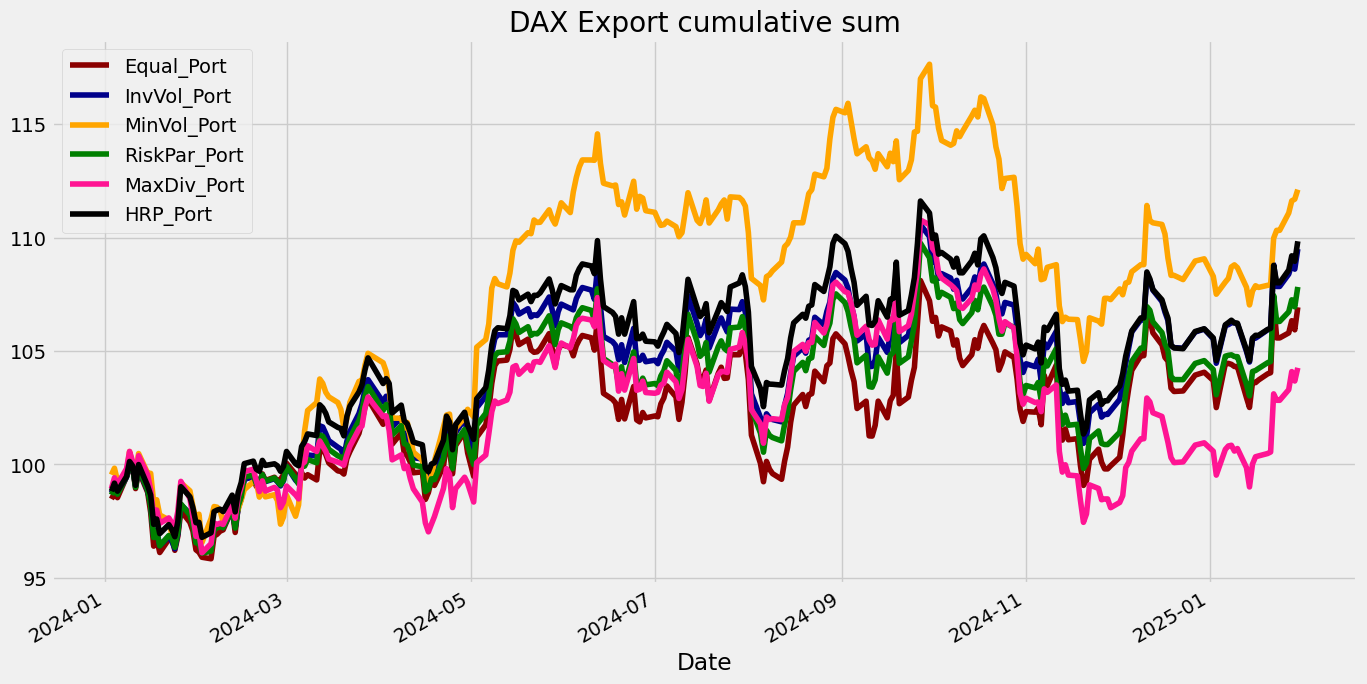

In [190]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Set colors
colors = ['darkred', 'darkblue', 'orange', 'green', 'deeppink', 'black']

# Plot 'DaxExpTick' cumulative sum
CumRet_Exp = Cum_PortRet['DaxExpTick']
print(CumRet_Exp.iloc[-1], '\n')
CumRet_Exp.plot(color=colors, figsize=(15, 8), title = 'DAX Export cumulative sum')
plt.show()

Equal_Port      104.174501
InvVol_Port     107.164094
MinVol_Port     118.930750
RiskPar_Port    105.587214
MaxDiv_Port     109.300730
HRP_Port        107.927149
Name: 2025-01-30 00:00:00, dtype: float64 



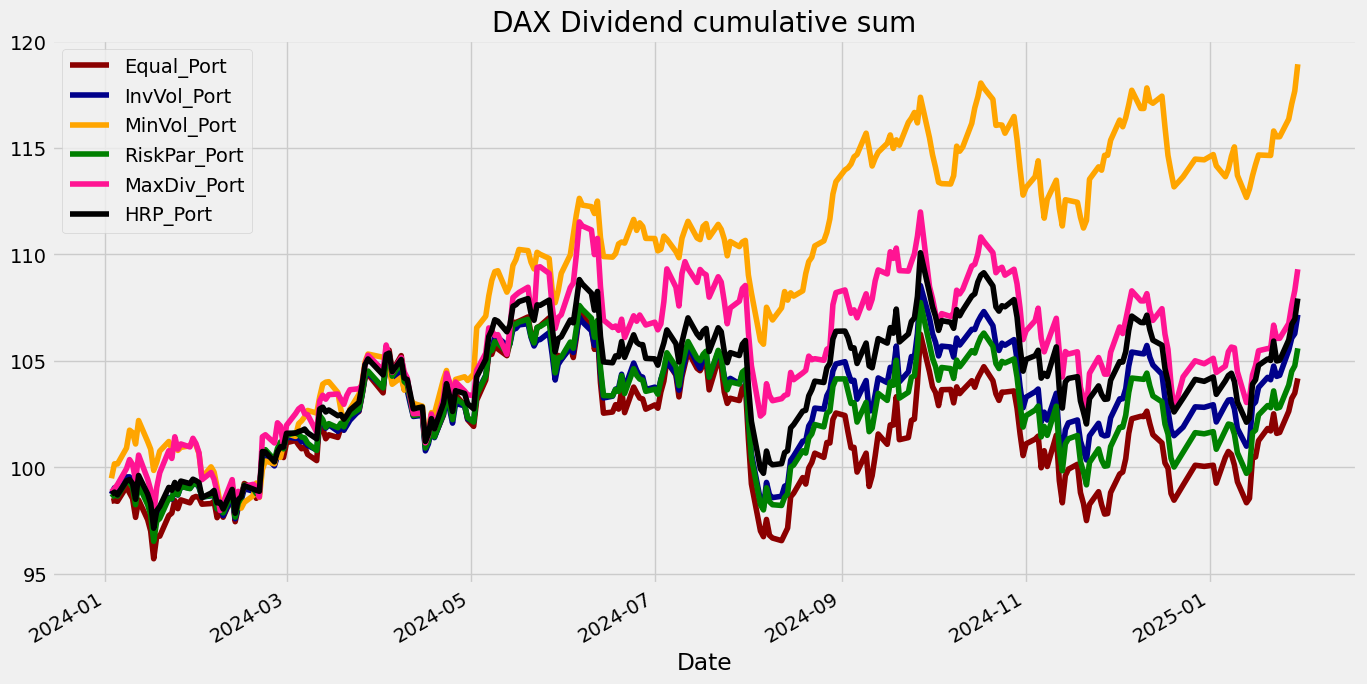

In [191]:
# Plot 'DaxDivTick' cumulative sum
CumRet_Div = pd.DataFrame( Cum_PortRet['DaxDivTick'])

# Print finanl values
print(CumRet_Div.iloc[-1], '\n' )


CumRet_Div.plot(color=colors, figsize=(15, 8), title = 'DAX Dividend cumulative sum')
plt.show()

Equal_Port      119.942422
InvVol_Port     122.534065
MinVol_Port     123.075807
RiskPar_Port    121.146507
MaxDiv_Port     115.938805
HRP_Port        123.631968
Name: 2025-01-30 00:00:00, dtype: float64 



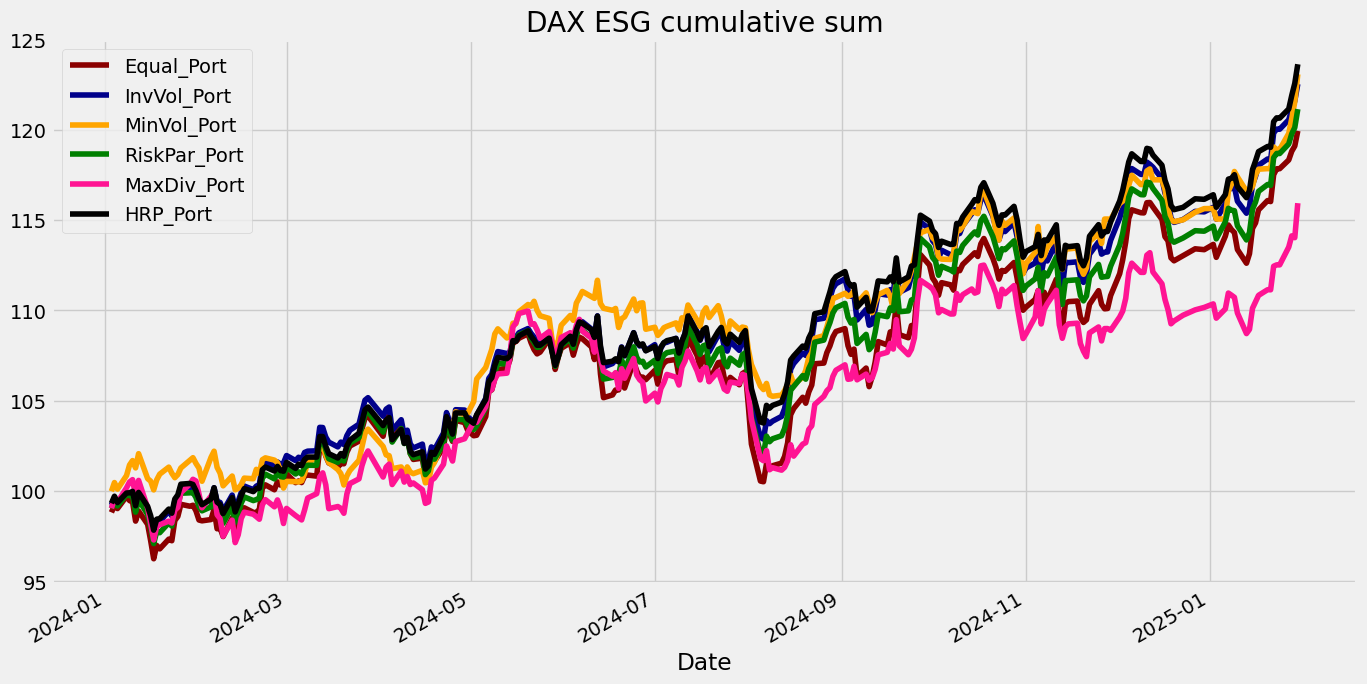

In [192]:
# Plot 'DaxEsgTick' cumulative sum
CumRet_Esg = Cum_PortRet['DaxEsgTick']

print(CumRet_Esg.iloc[-1], '\n')
CumRet_Esg.plot(color=colors, figsize=(15, 8), title = 'DAX ESG cumulative sum')
plt.show()

The portfolio evolution is self-explanatory, as the trajectory of each strategy is clearly visible.

Graphs depicts investment strategies performed well under the DAX ESG.


- Also strategies are not very volatile under the DAX ESG sector, compared to others. There's something about this sector, isn't it?

$$\quad$$
$$\quad$$
$$\quad$$
$$\quad$$

# **2. MARKET RISK ANALYSIS**

Risk is the potential for an adverse outcome or loss resulting from uncertainty or variability in future outcomes. Risk management is the processs of trying to define the various exposures, outcomes and risk that an institution face. Example risk that a firm may face include, Market Risk, Counterparty Credit Risk, Operational Risk, and Model Risk amongt others.

Market risk is defined as the risk emanating from the adverse movements in the portfolio's assets. These risks could be idiosyncratic, such as default of a company or could be sytematic, such as exposure to the global equity market. Modelling these risk requires historical data analysis, statistical models, factor models, monte carlo simulation, stress testing, correlation and covariance analysis amongt others.

In this part of the analysis we conduct a thorough market risk analysis for the evolution of the aforementioned investment strategies. We utilize variuos risk metrics to determine which strategy is less vulnerable to market issues and sytematic risk. These metrics include rolling volatility, (Conditional) Value at Risk, market Beta, and R-squared.  

This will give us insights into the market risk profile of each strategy and further highlight those that are not just profitable but also resilient to market turbulence.

## **Risk Metrics**:
**Volatility:** Volatility refers to the degree of variation of financial asset over time. It measures the fluctuations in returns, indicating an asset's riskiness. Volatility is essentially the annualized standard deviation of returns. A higher volatility implies a higher portfolio risk.

**Value at Risk:**  A measure that quantifies the potential loss in the value of a portfolio over a specified period of time for a given confidence level.
Mathematically, VaR for a given level of confidence, (1-$\alpha$), can be found by inverting the CDF of the distribution of the returns.

Let $x$ be the return and $F(x)$  the CDF of the the distribution of the returns or the joint distributiion of the the portfolio returns and $f(x)$ the PDF. Thus the VaR at $\alpha$ - significant level is computed as:

\begin{equation} VaR_{\alpha} = F^{-1}\,(\alpha) . \end{equation}

VaR at (1-$\alpha$) confidence level is the distribution's  $\alpha^{th}$  percentile of the returns.  VaR however turns out not to be a **coherent risk measure** as it is not **sub-additive**. Sub-aditivity states that a portfolio VaR, risk,  should not grow as we increase the number of assets in the portfolio, this is in-line with the concept of risk diversification/reduction, as assets in the portfolio increases.


**Conditional Value at Risk:**  CVaR measures the expected loss conditional on exceeding a given VaR threshold.   CVaR also known as **expected shortfall** is designed to overcome the problems faced by VaR. It can be proven to be a **coherent risk measure** that obeys the property of sub-additivity. Mathematically, for a given $\alpha$ siginificat level, CVaR is equal to:

\begin{equation}  CVaR_{\alpha} = \frac{1}{\alpha} \int _{-\infty}^{VaR_{\alpha}} x f(x)dx. \end{equation}

 Elsewhere, still on risk metrics though, we look at metrics that can be used to quantify the systematic risk of an investment strategy. Here, we use Market Beta as well as the strategy's alpha, to gauge the effectiveness of each strategy.

 **Market Beta:** Said previuosly, we can gauge the systematic risk of a portfolio by it's market beta. Market Beta is a measure of exposure for a given strategy to a broader market. Market Betas can be calculated using standard regression techniques as follows:

 \begin{equation} r_{i,t} = \alpha \, + \beta \, r_{m,t} \, + \epsilon_{t}. \end{equation}

 Where $\,$ $r_{i,t}$ $\,$ is the return of strategy $i$ at time $t$ and $\,$ $r_{m,t}$  $\,$ is the market return at time $\,$ $t$. The (Jensens's) alpha here has different interpretation to the prevoiusly defined alpha under VaR. It is the excess return not due to the market, the alpha of a strategy is then a better estimation of the portion of the return that was due skill of the strategy rather than market exposure.


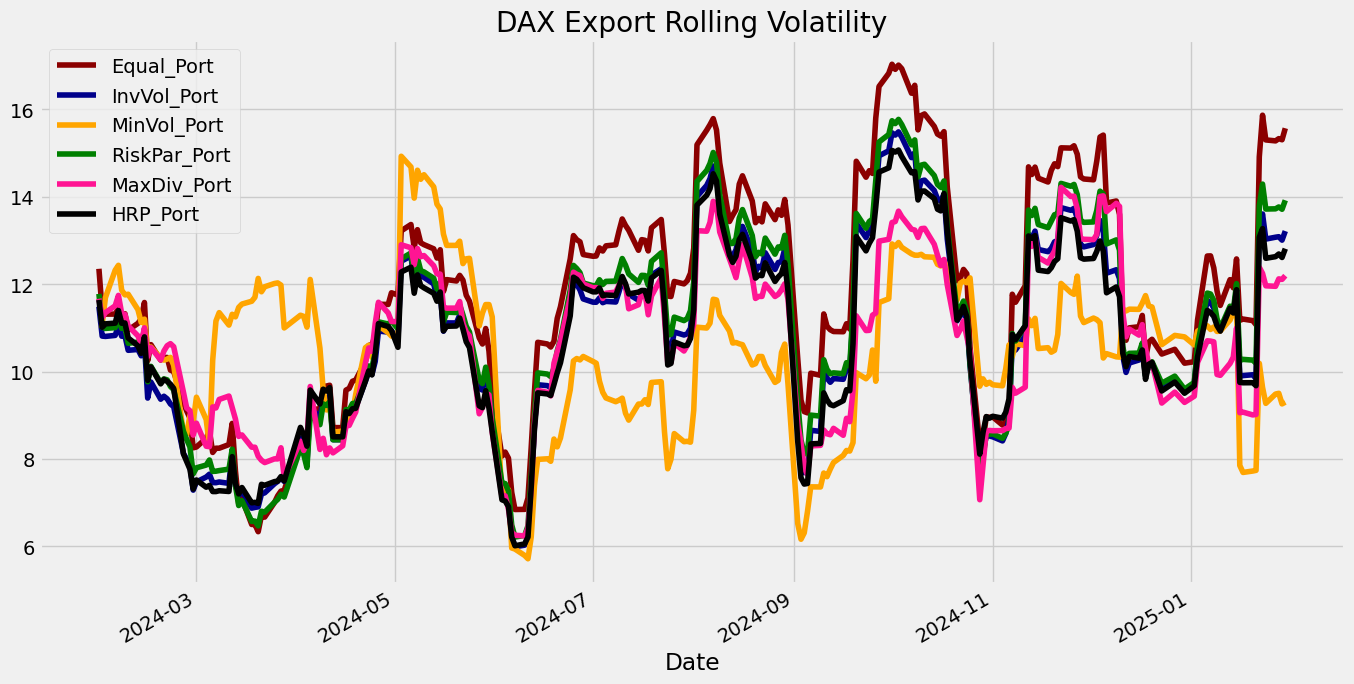

In [149]:
# @title Rolling Volatility
# Function to compute annualized standard deviation /volatility
def vol(x: pd.Series)-> float:
  # Vol: Volatility
  return np.std(x) * np.sqrt(252) * 100

# Compute 21 days (roughly a month) rolling volatility
Rolling_Vol =  {key: O_PortRet[key].rolling(21).apply(vol) for key in O_PortRet.keys()}

# Plot 'DaxExpTick' volatility
Rolling_Vol['DaxExpTick'].plot(color=colors, figsize=(15, 8), title = 'DAX Export Rolling Volatility')
plt.show()

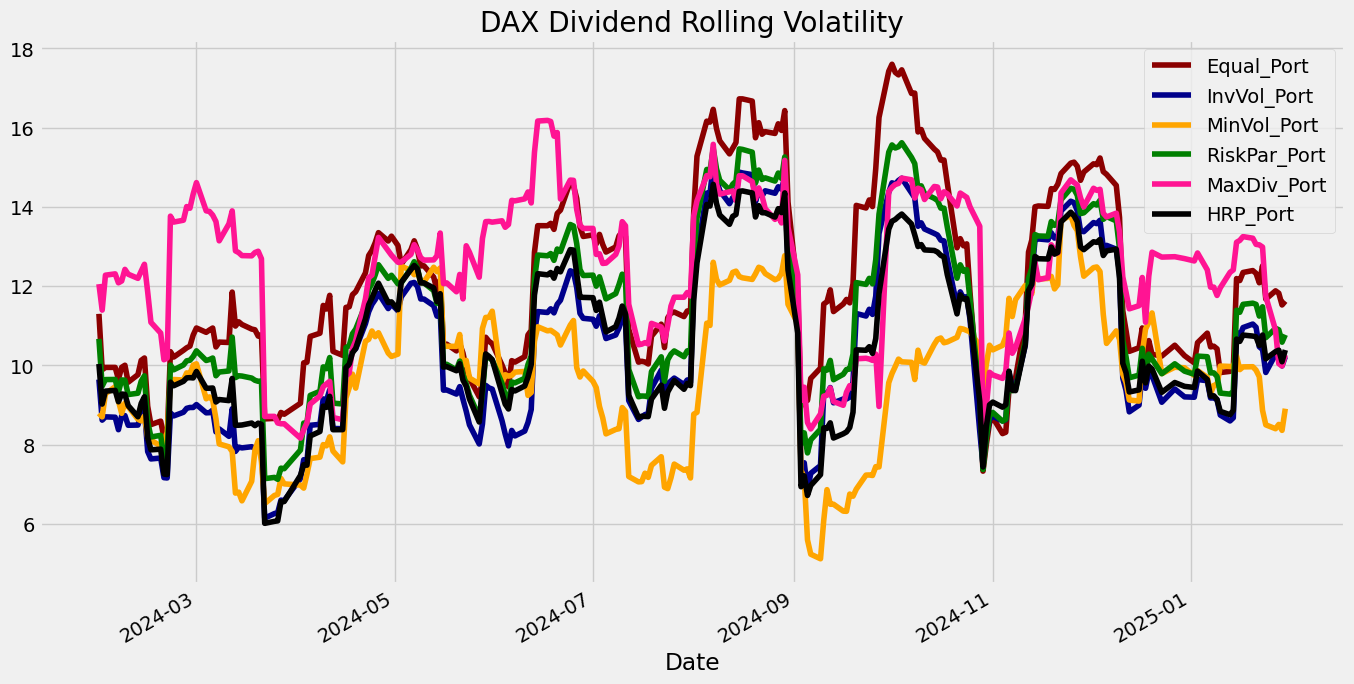

In [150]:
# Plot 'DaxDivTick' volatility
Rolling_Vol['DaxDivTick'].plot(color=colors, figsize=(15, 8), title = 'DAX Dividend Rolling Volatility')
plt.show()

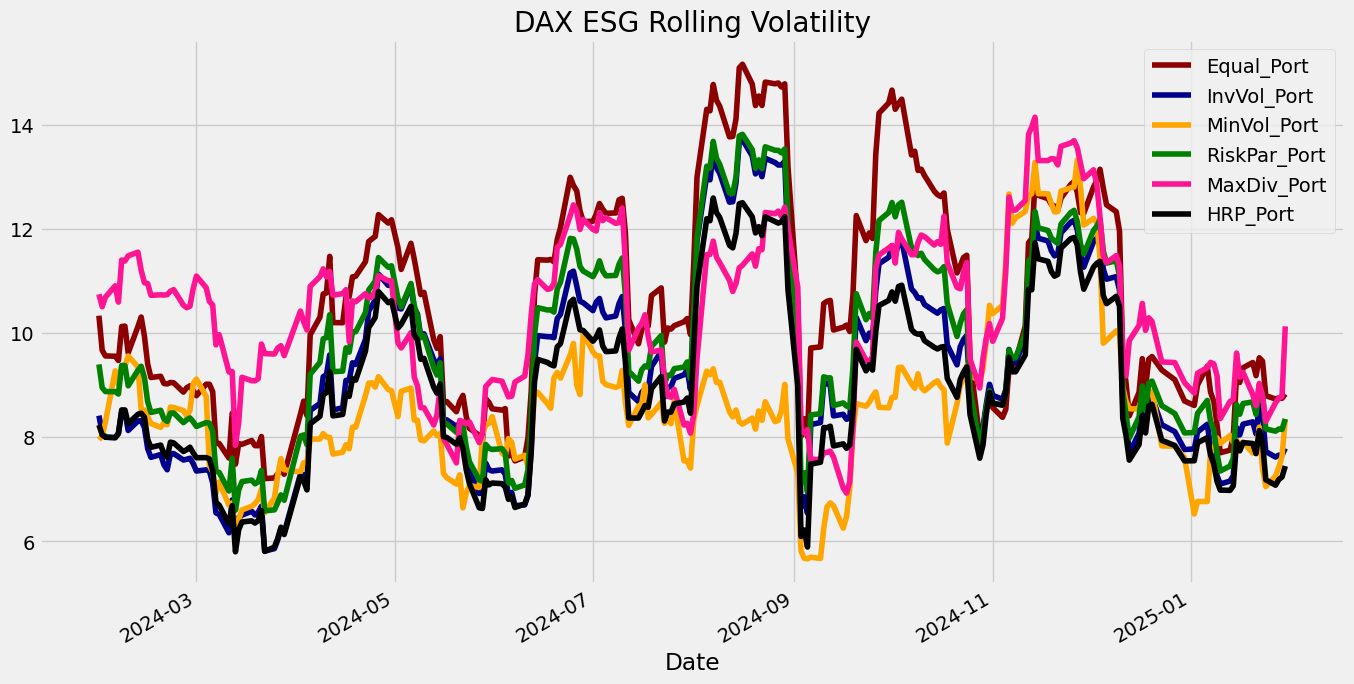

In [151]:
# Plot 'DaxEsgTick' volatility
Rolling_Vol['DaxEsgTick'].plot(color=colors, figsize=(15, 8), title = 'DAX ESG Rolling Volatility')
plt.show()

 **Higher lines on the plot highlight periods of elevated volatility for each strategy, indicating times of significant price fluctuations within those individual strategies.**

 Across each sector the **Maximum Diversification** strategy appears the **most volatile** and the **Hierarchical Risk Parity** strategy is the **least volatile** on average. However, the last two months: Dec 2025 and Jan 2025, minimum volatility strategy has shown resilience to market shock and the other strategies have exhibited high volatility.  

In [152]:
# @title Rolling VaR
# Import scipy.stats to compute VaR and CVaR as described under risk metrics
import scipy.stats as stats

# Set significance level
alpha = 0.05

# Function to compute VaR
def var(x: pd.Series, percent = True)-> float:
  # var: Value at Risk
  if percent:
    return np.quantile(x, alpha) * 100
  else:
    return np.quantile(x, alpha)

# Function to compute CVaR
def cvar(x: pd.Series)-> float:
  # cvar: Conditional Value at Risk
  x = x[x <= np.quantile(x, alpha)]
  return np.mean(x)

# Compute threshold VaR: 5% quantile of normal distribution
VaR = stats.norm.ppf(alpha)

# Compute CVaR as expected loss beyond VaR
CVaR = (1/(alpha)) * stats.norm.expect(lambda x: x, ub = VaR)
#VaR, CVaR = VaR / 100,   CVaR / 100

print(f'VaR   = {VaR:.5f}')
print(f'CVaR  = {CVaR:.5f}')
# Monte Carlo VaR and CVaR
norm_dist_ret = np.random.normal(0, 1, 100_000)
print(f'VaR   = {var(norm_dist_ret, False):.5f}')
print(f'CVaR  = {cvar(norm_dist_ret):.5f}')


VaR   = -1.64485
CVaR  = -2.06271
VaR   = -1.64830
CVaR  = -2.05227


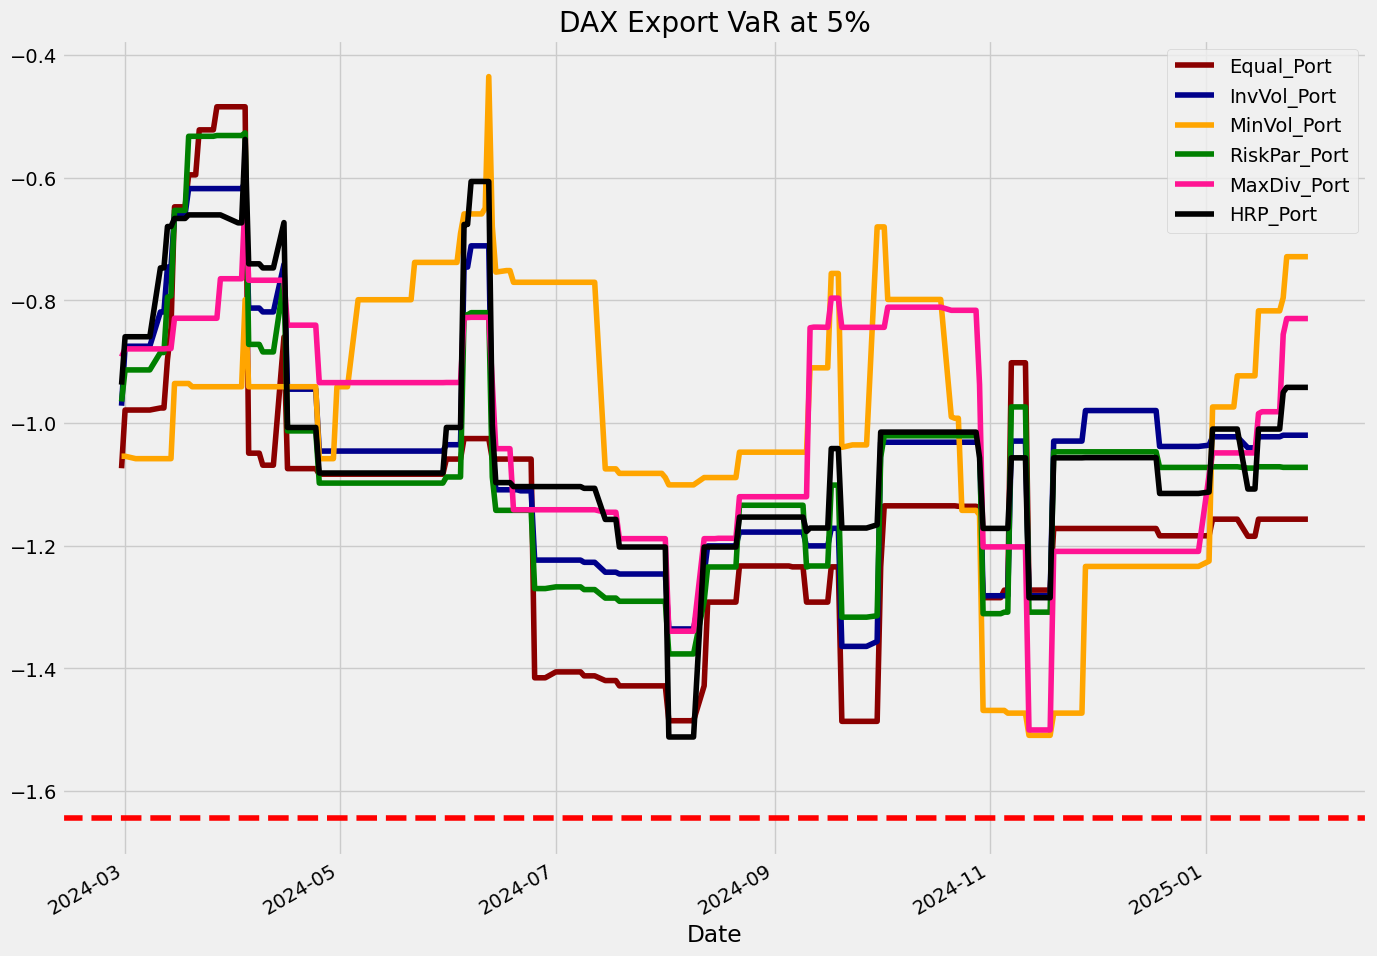

In [153]:
# Compute rolling 5% VaR with 42 days (roughly two months) observation
Rolling_VaR5 = {key: O_PortRet[key].rolling(42).apply(var) for key in O_PortRet.keys()}

# Plot Dax Export rolling VaR
Rolling_VaR5['DaxExpTick'].plot(color=colors, figsize=(15, 12), title = 'DAX Export VaR at 5%')
# Add a horizontal line at the VaR level
plt.axhline(y=VaR, color='r', linestyle='--', label=f'VaR = {VaR:.4f}')
plt.show()

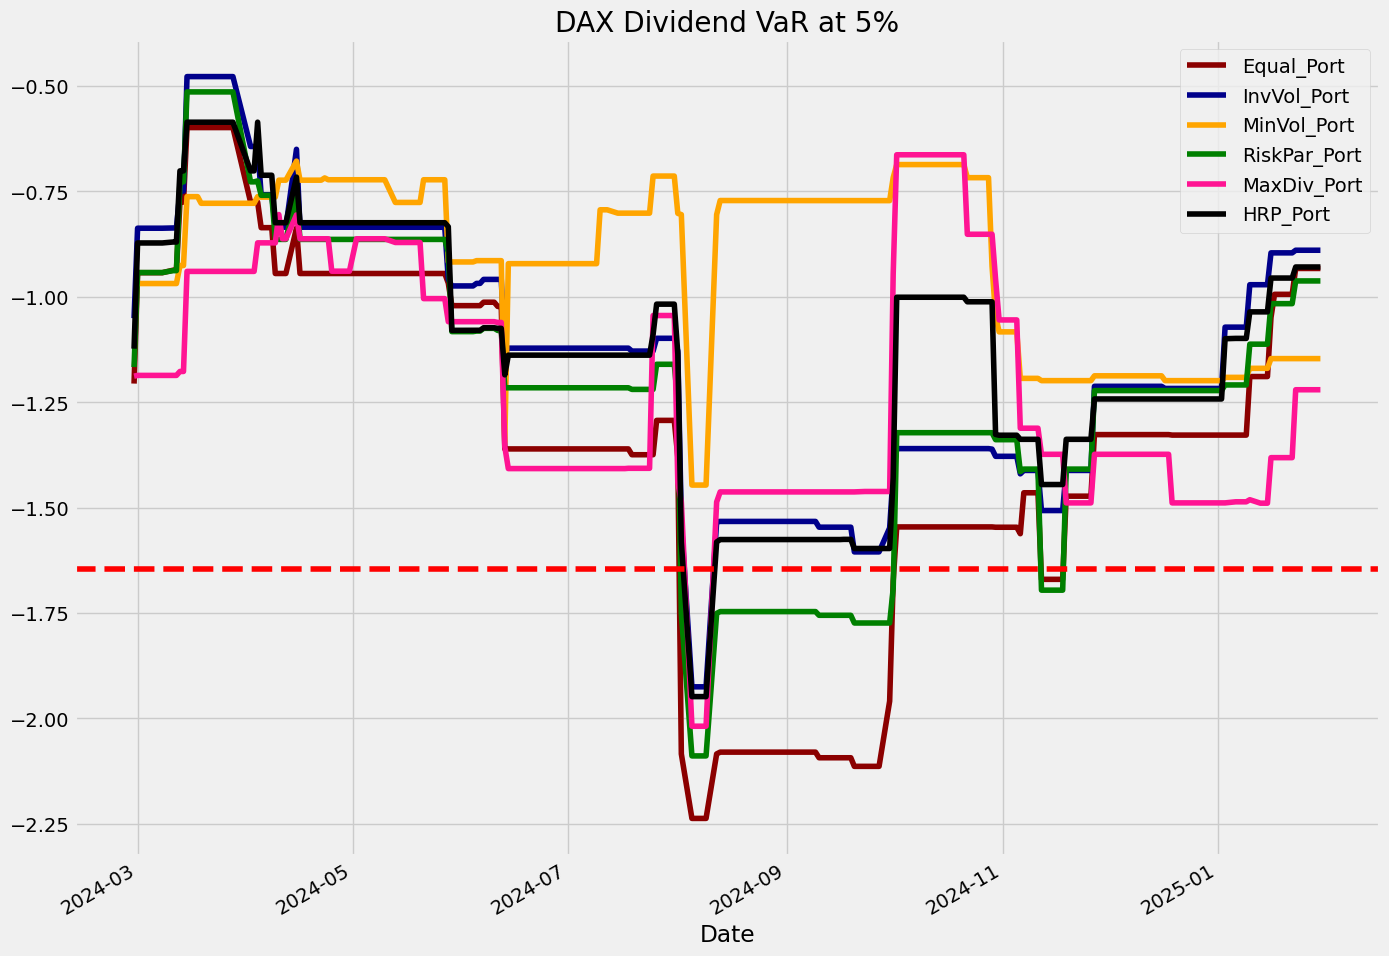

In [154]:
# Plot Dax Dividend rolling VaR
Rolling_VaR5['DaxDivTick'].plot(color=colors, figsize=(15, 12), title = 'DAX Dividend VaR at 5%')
# Add a horizontal line at the VaR level
plt.axhline(y=VaR, color='r', linestyle='--', label=f'VaR = {VaR}')
plt.show()

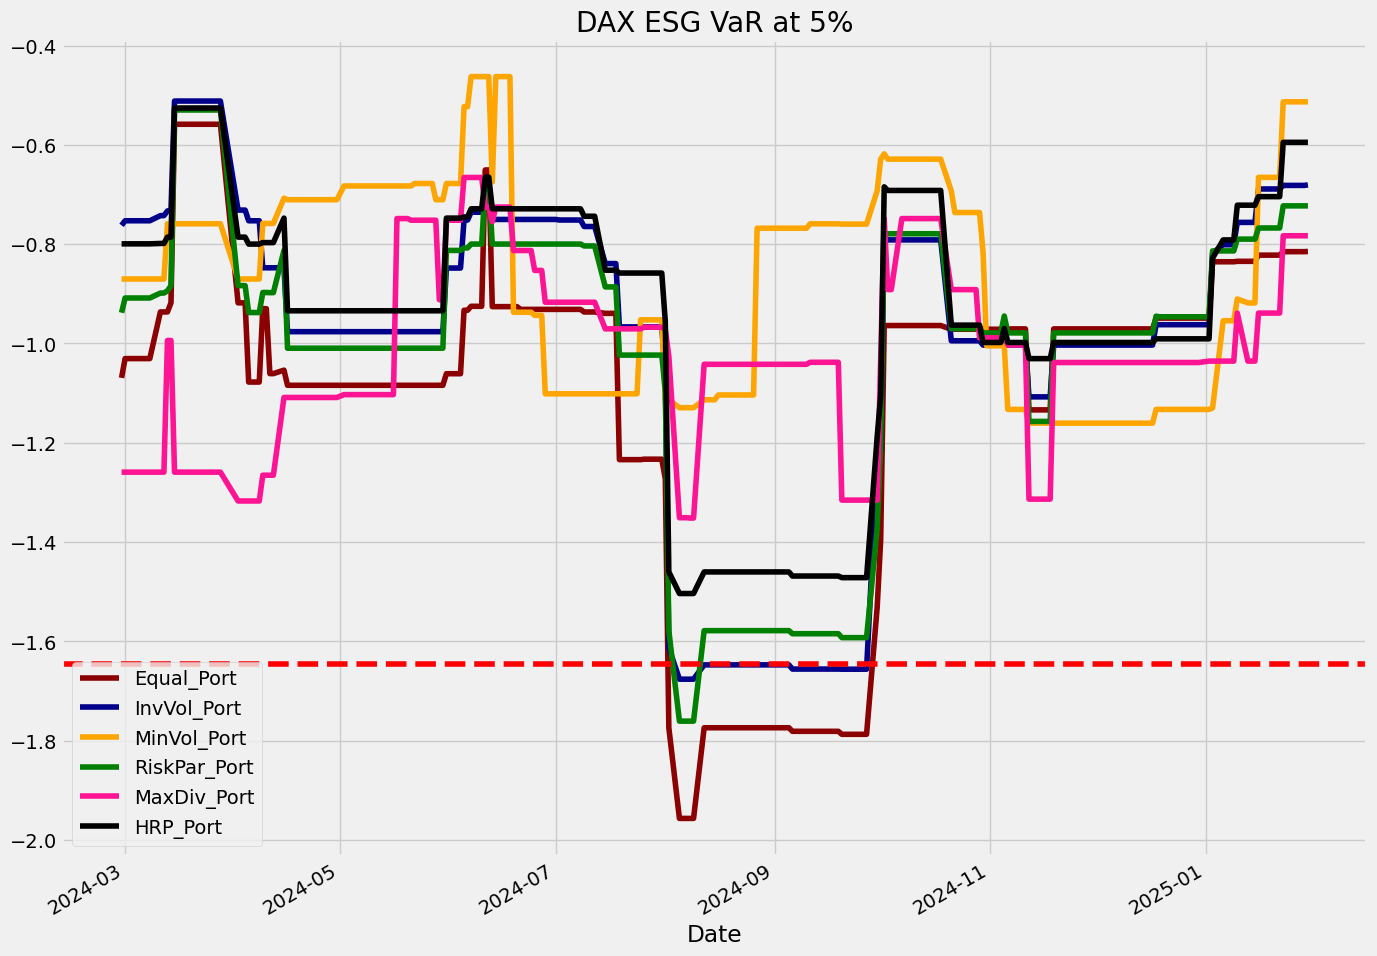

In [155]:
# Plot Dax ESG rolling VaR
Rolling_VaR5['DaxEsgTick'].plot(color=colors, figsize=(15, 12), title = 'DAX ESG VaR at 5%')
# Add a horizontal line at the VaR level
plt.axhline(y=VaR, color='r', linestyle='--', label=f'VaR = {VaR}')
plt.show()

 **Exceeding the threshold indicates how much worse a strategy performed in extreme situations during that period**

We can clearly see the strategies that violates the threshold and for how long the stayed under the threshold.

Under the DAX Export no strategy went beyond the threshold, which is a good sign.

With the DAX dividend the strategies experienced some extreme returns, indicating these sector was affected for the depicted period, August 2024, well except the min vol strategy.  

Only three strategies encountered extreme returns under the ESG sector: Inverse vol, risk parity and equally weighted portfolios. All occuring in Aug and Sept 2024.

In general, graph also depicts decrease in occuring extreme returns in recent months: Dec 2024, Jan 2025; that is a good sign.




$$\quad$$

Elsewhere, to examine the **SYSTEMATIC RISK** for each strategy, we need a market portfolio. For the market portfolio we utilize the DAX 40 index which represents the broader German equity market.

In [156]:
# Set date, we use in-sample date previuosly defined

# Download DAX data and compute returns to be used to compute market beta
DAX = read_data('^GDAXI', start, end, freq)
#DAX.index = O_Returns['DaxExpTick'].index
DAX_ret = DAX.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


In [157]:
# View info and verify dates corresponds
DAX_ret.info(), O_PortRet['DaxExpTick'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2024-01-03 to 2025-01-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GDAXI  274 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2024-01-03 to 2025-01-30
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Equal_Port    274 non-null    float64
 1   InvVol_Port   274 non-null    float64
 2   MinVol_Port   274 non-null    float64
 3   RiskPar_Port  274 non-null    float64
 4   MaxDiv_Port   274 non-null    float64
 5   HRP_Port      274 non-null    float64
dtypes: float64(6)
memory usage: 15.0 KB


(None, None)

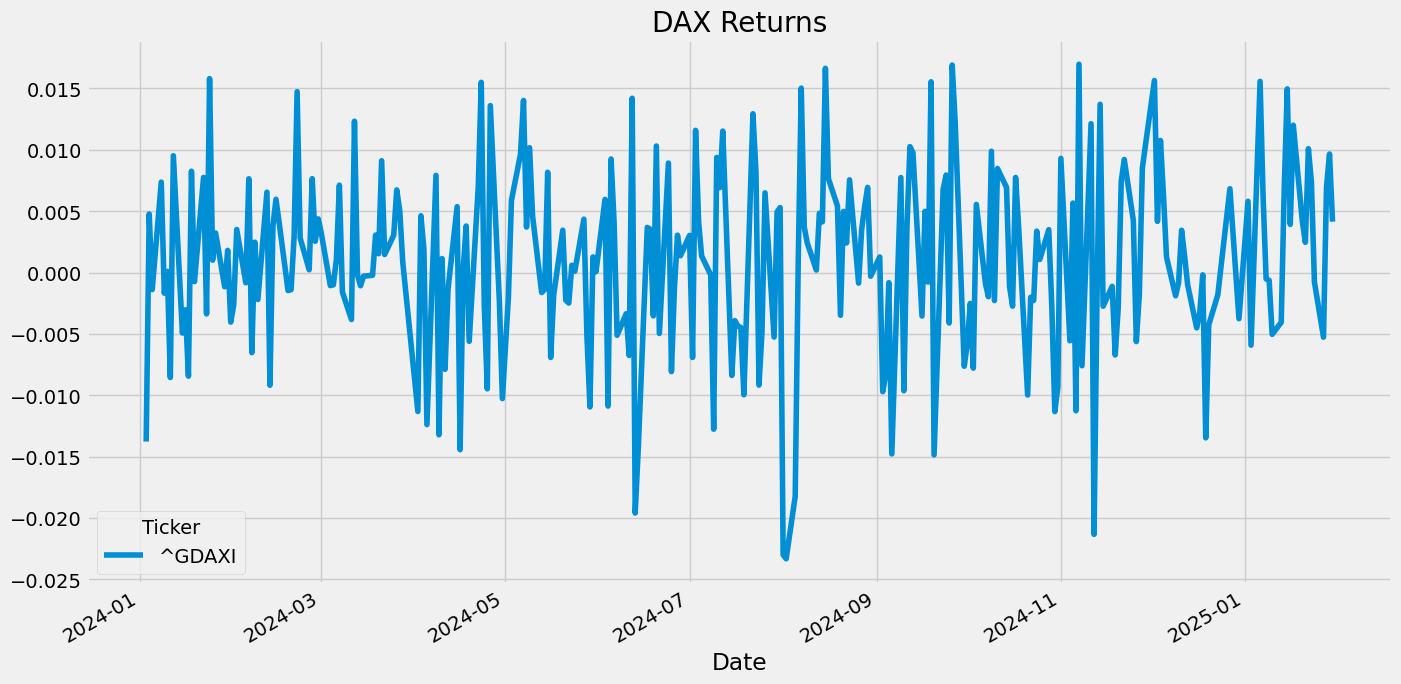

In [158]:
# Plot
DAX_ret.index = O_PortRet['DaxExpTick'].index
DAX_ret.dropna(inplace=True)
DAX_ret.plot(figsize=(15, 8), title = 'DAX Returns')
plt.show()

In [159]:
# @title Assessing systematic risk

def beta(y: pd.Series) -> float:
    if len(y) < 2:  # Regression requires at least two points
        return np.nan  # Return NaN instead of failing

    common_index = y.index.intersection(DAX_ret.index)  # Align indices
    if len(common_index) < 2:  # Ensure we have enough matching data points
        return np.nan

    x = sm.add_constant(DAX_ret.loc[common_index])
    model = sm.OLS(y.loc[common_index], x).fit()

    return model.params[1]

def j_alpha(y: pd.Series) -> float:
    if len(y) < 2:  # Regression requires at least two points
        return np.nan  # Return NaN instead of failing

    common_index = y.index.intersection(DAX_ret.index)  # Align indices
    if len(common_index) < 2:  # Ensure we have enough matching data points
        return np.nan

    x = sm.add_constant(DAX_ret.loc[common_index])
    model = sm.OLS(y.loc[common_index], x).fit()

    return model.params[0] * 100


def j_alpha(y: pd.Series) -> float:
    if len(y) < 2:  # Regression requires at least two points
        return np.nan  # Return NaN instead of failing

    common_index = y.index.intersection(DAX_ret.index)  # Align indices
    if len(common_index) < 2:  # Ensure we have enough matching data points
        return np.nan

    x = sm.add_constant(DAX_ret.loc[common_index])
    model = sm.OLS(y.loc[common_index], x).fit()

    return model.params[0] * 100


def r_2(y: pd.Series) -> float:
    if len(y) < 2:  # Regression requires at least two points
        return np.nan  # Return NaN instead of failing

    common_index = y.index.intersection(DAX_ret.index)  # Align indices
    if len(common_index) < 2:  # Ensure we have enough matching data points
        return np.nan

    x = sm.add_constant(DAX_ret.loc[common_index])
    model = sm.OLS(y.loc[common_index], x).fit()

    return model.rsquared * 100

In [160]:
#beta(O_PortRet['DaxExpTick'])

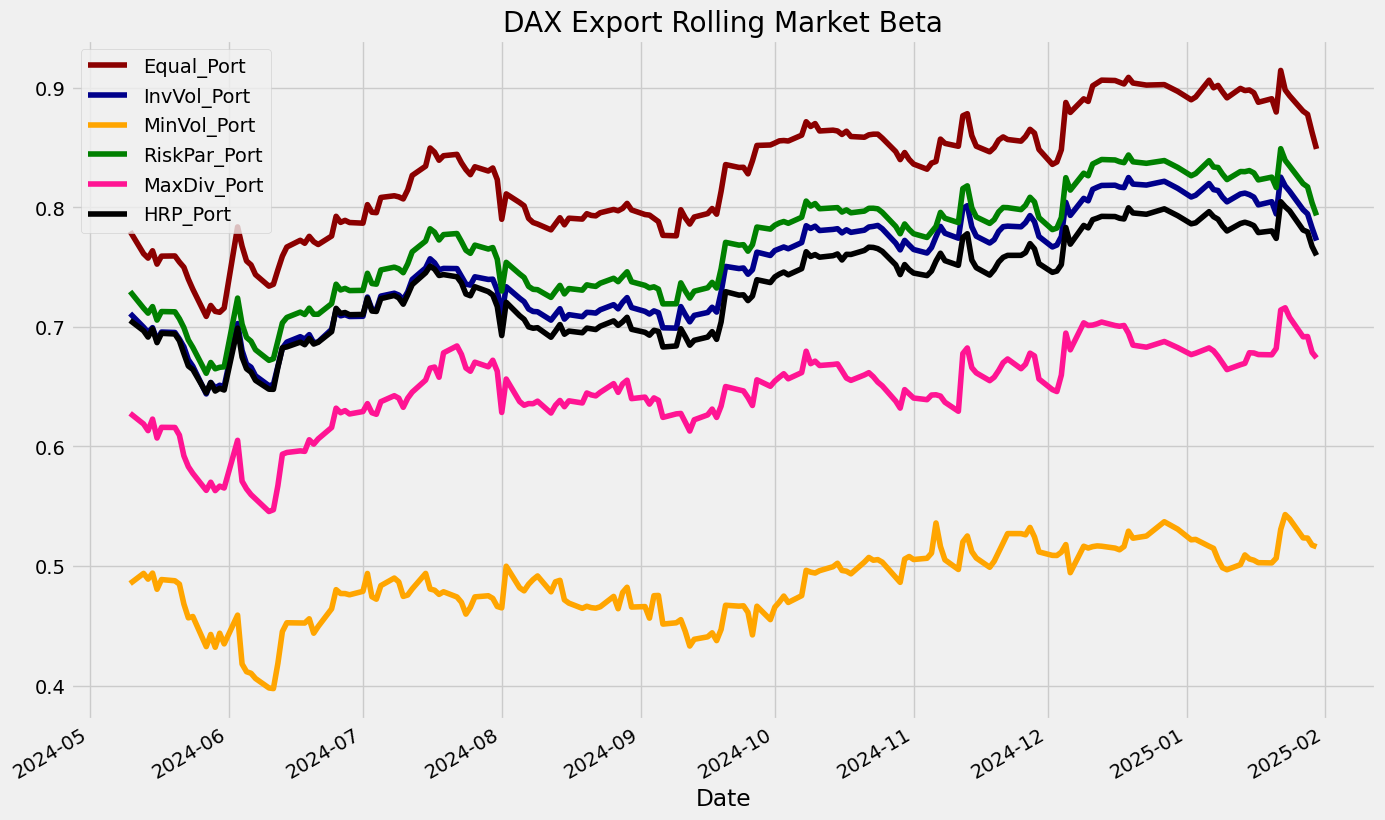

In [161]:
# @title Rolling Market Beta
# Compute rolling beta
# We use 90 days (roughly a quarter) to compute the rolling market beta
Rolling_beta = {key: df.rolling(90).apply(beta) for key, df in O_PortRet.items()}

# Plot Dax Export rolling market beta
Rolling_beta['DaxExpTick'].plot(color=colors, figsize=(15, 10), title = 'DAX Export Rolling Market Beta')
plt.show()

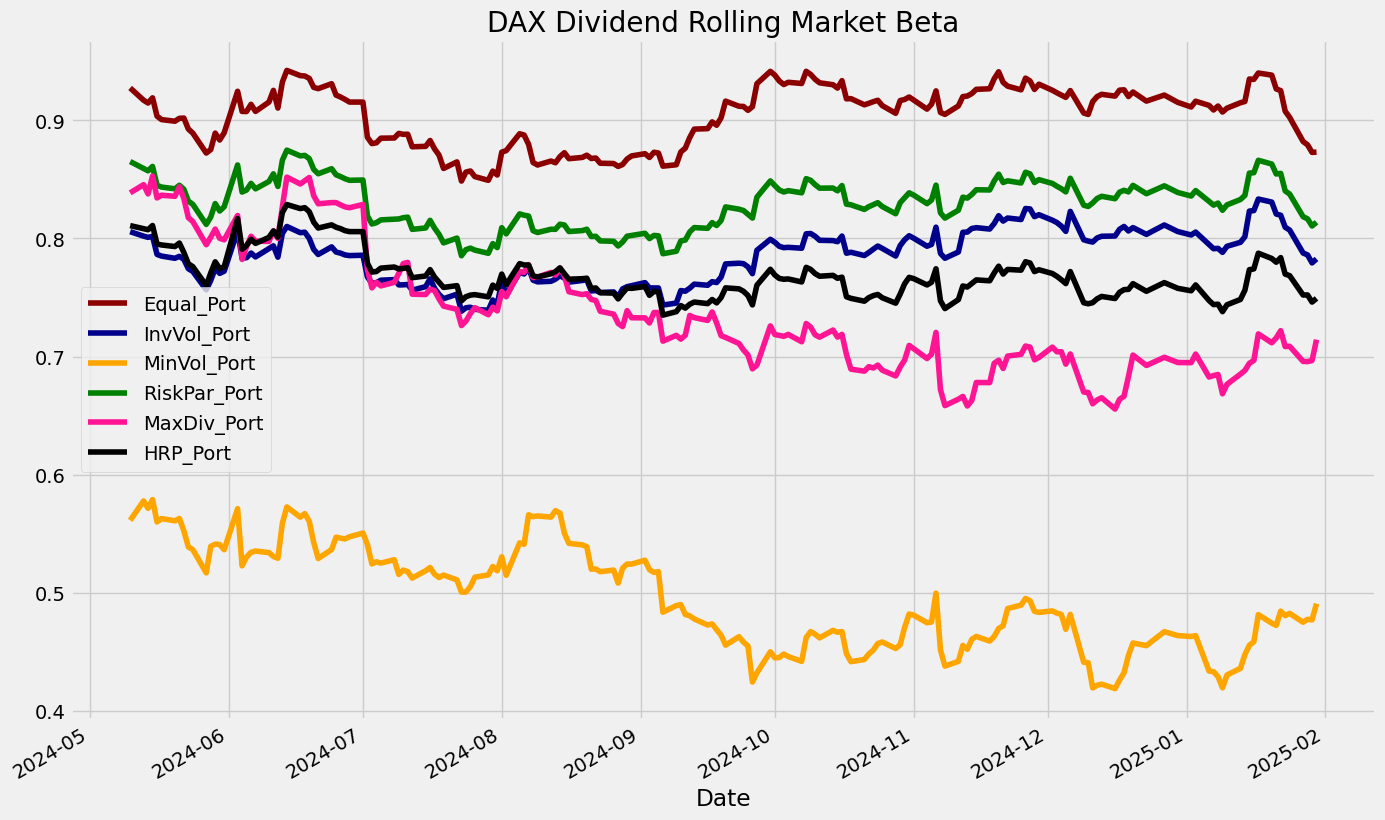

In [162]:
# Plot Dax Dividend rolling beta
Rolling_beta['DaxDivTick'].plot(color=colors, figsize=(15, 10), title = 'DAX Dividend Rolling Market Beta')
plt.show()

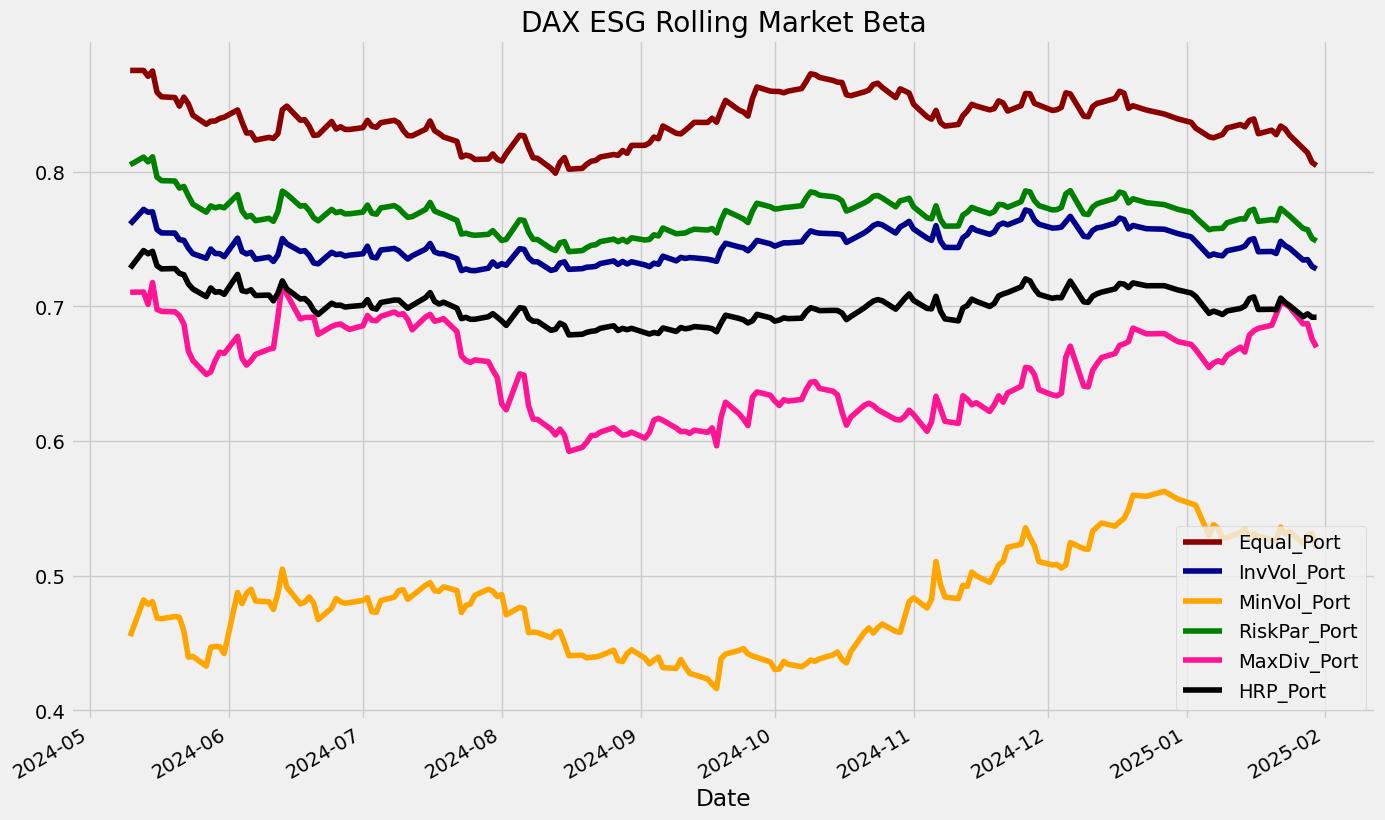

In [163]:
# Plot Dax ESG rolling beta
Rolling_beta['DaxEsgTick'].plot(color=colors, figsize=(15, 10), title = 'DAX ESG Rolling Market Beta')
plt.show()

**Market Beta less than 1 is typically ideal.  Moreover, the lower the market beta the less exposed the underlying stretegy is to sytematic shocks**.

Across each sector the equally weighted strategy is unsurprisingly the most exposed to sytematic shock as it's weight allocation methodlogy does not account for risk factors, correlations or volatility. On the other hand the Minimum Volatility portfolio is the least exposed to sytematic risk.

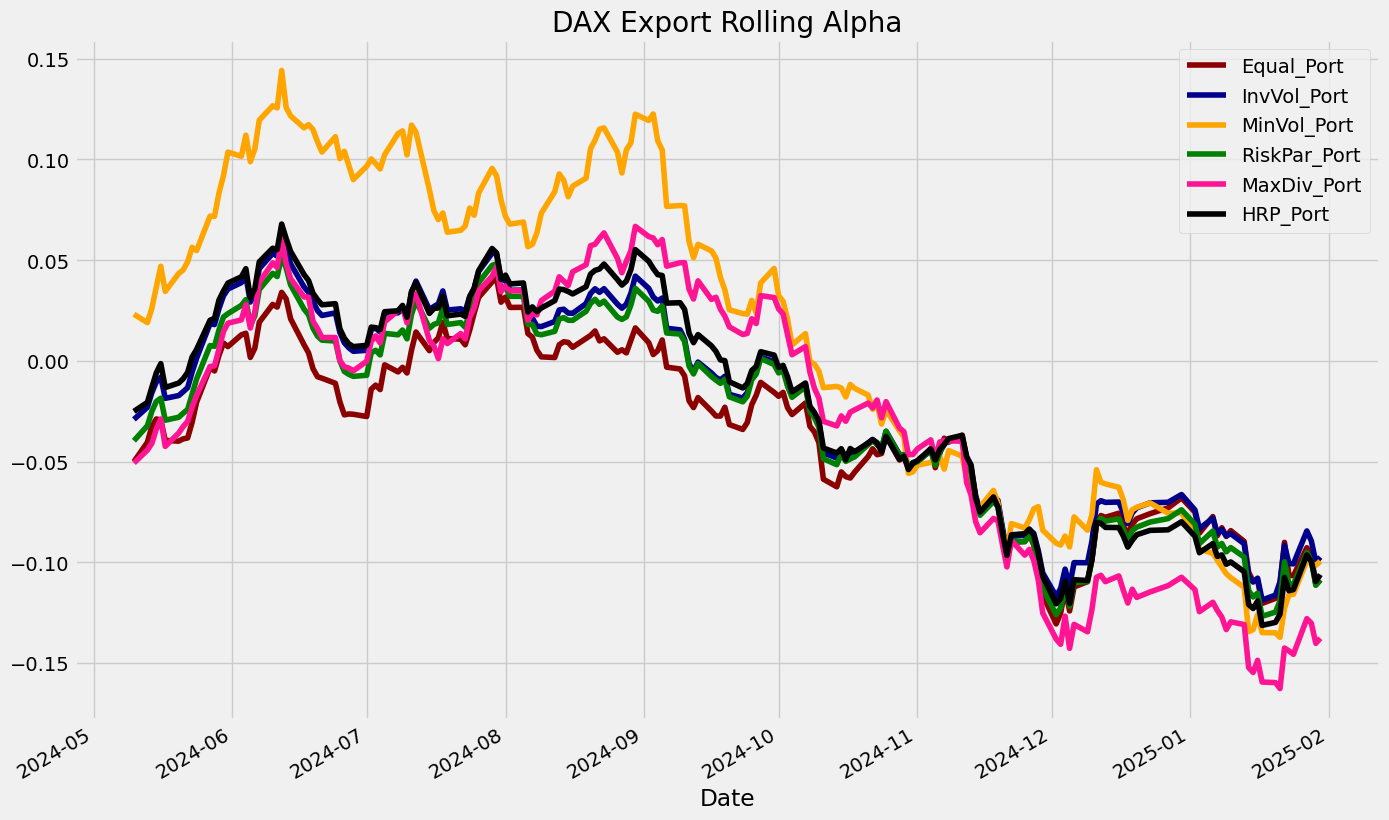

In [164]:
# @title Rolling Jansens's Alpha
# Compute rolling beta
# We use 90 days (roughly a quarter) to compute the rolling market beta
Rolling_alpha = {key: df.rolling(90).apply(j_alpha) for key, df in O_PortRet.items()}

# Plot Dax Export rolling alpha
Rolling_alpha['DaxExpTick'].plot(color=colors, figsize=(15, 10), title = 'DAX Export Rolling Alpha')
plt.show()

In [165]:
# Plot Dax Dividend rolling Alpha
Rolling_alpha['DaxDivTick'].plot(color=colors, figsize=(15, 10), title = 'DAX Dividend Rolling Alpha')
plt.show()

In [166]:
# Plot Dax ESG rolling Alpha
Rolling_alpha['DaxEsgTick'].plot(color=colors, figsize=(15, 10), title = 'DAX ESG Rolling Alpha')
plt.show()

**The higher the Alpha the better the strategy.**

Across each sector the Minimum volatility alpha stays above zero morethan the the others on average.



The **Minimum Volatility** investment strategy has showned, on average, it is the least volatile strategy, less likely to face returns below the VaR threshold, least susceptible to systematic risk and market exposure, and with a better Jensen's alpha, demonstrating the strategy's skill. The portfolio weight distribution however is sub-optimal. Moreover, considering MinVol did not perfrom substantially different from HRP, and with HRP having a more balanced weight allocation, therefore HRP will be a more suitable strategy.

> Note: These analysis were carried out for educational purpose. Thanks for reading.

In [167]:
# The End!!



---



---



# **References**




- Alexander, C. (2008). Market Risk Analysis Volume I: Quantitative Methods in Finance. Chichester: John Wiley \& Sons.
    
- Allen, S. (2003). Financial Risk Management: A Practitioner’s Guide to Managing Market and Credit Risk. Hoboken, NJ: John Wiley \& Sons.
    
- Clarke, R., H. de Silva, and S. Thorley (2013). Risk Parity, Maximum Diversification, and Minimum Variance: An Analytic Perspective. Journal of Portfolio Management 39, 39-53.
    
- Kelliher, C. (2022). Quantitative Finance with Python: A Practical Guide to Investment Management, Trading, and Financial Engineering (1st ed.). Chapman \& Hall, CRC Press. (Chapman \& Hall/CRC Financial Mathematics series).
    
- Ledoit, O., \& Wolf, M. (2001). Improved Estimation of the Covariance Matrix of Stock Returns with an Application to Portfolio Selection, 10, 603–621.
    
- López de Prado, M. (2016). Building Diversified Portfolios That Outperform Out of Sample, The Journal of Portfolio Management, 42(4), pp. 59–69. Available at: https://jpm.pm-research.com/content/42/4/59
    
- López de Prado, M. (2018). \textit{Advances in Financial Machine Learning. John Wiley \& Sons.
    
- Markowitz, H. (1952). Portfolio Selection. Journal of Finance, 7(1), pp.77-91.
    
- McNeil, A., Frey, R., and Embrechts, P. (2010). Quantitative Risk Management: Concepts, Techniques, and Tools. Princeton University Press.